# Vegetable Image Classification

Name: Tan Wen Tao Bryan <br>
Admin No: P2214449 <br>
Class: DAAA/FT/2B/01<br>

-------------------------------------------------------------------------------------------------------------------------------

# Project Objective

- To create a CNN for classifying grayscaled images of vegetables and evaluate the performance of the network

# Index
1.  Exploratory Data Analysis<br>
2.  Feature Engineering<br>
3.  Model Selection/Model Evaluation<br>
4.  Model Improvement<br>
5.  Summary

# References
1. Das, A., 2020, Convolution Neural Network for Image Processing — Using Keras. [online]. Available from: https://towardsdatascience.com/convolution-neural-network-for-image-processing-using-keras-dc3429056306 [Accessed at 5 Nov 2023]
2. M. Israk Ahmed, 2021, DCNN-Based Vegetable Image Classification Using Transfer Learning: A Comparative Study. [online]. Available from: https://www.researchgate.net/publication/352846889_DCNN-Based_Vegetable_Image_Classification_Using_Transfer_Learning_A_Comparative_Study [Accessed at 5 Nov 2023]
3. Bala-Priya, C., 2020, Build Better Deep Learning Models with Batch and Layer Normalization. [online]. Available from: https://www.pinecone.io/learn/batch-layer-normalization/ [Accessed at 17 Nov 2023]
4. Anuja, 2017, L1 and L2 Regularization Methods. [online]. Medium. Available from: https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c [Accessed at 17 Nov 2023]
5. Chi-Feng, W., 2019, The Vanishing Gradient Problem. [online]. Medium. Available from: https://towardsdatascience.com/the-vanishing-gradient-problem-69bf08b15484 [Accessed at 17 Nov 2023]
6. Sanghvirajit, 2021, A Complete Guide to Adam and RMSprop Optimizer. [online]. Medium. Available from: https://medium.com/analytics-vidhya/a-complete-guide-to-adam-and-rmsprop-optimizer-75f4502d83be [Accessed at 17 Nov 2023]
7. Gaudenz, B., 2023, Deep Residual Networks (ResNet, ResNet50) – 2024 Guide [online].
https://viso.ai/deep-learning/resnet-residual-neural-network/ [Accessed at 17 Nov 2023]
8. Salaskar, A., 2021, Quick Start with Tensorflow Callbacks. [online] Available from: https://www.analyticsvidhya.com/blog/2021/08/quick-start-with-tensorflow-callbacks/?utm_source=reading_list&utm_medium=https://www.analyticsvidhya.com/blog/2018/04/fundamentals-deep-learning-regularization-techniques/ [Accessed at 17 Nov 2023]
9. Srivignesh, R., 2021, Tuning Hyperparameters of An Artificial Neural Network Leveraging Keras Tuner [online]. Available from: https://www.analyticsvidhya.com/blog/2021/06/tuning-hyperparameters-of-an-artificial-neural-network-leveraging-keras-tuner/ [Accessed at 17 Nov 2023]
10.  datagen.tech, 2015, ResNet-50: The Basics and a Quick Tutorial [online]. Available from: https://datagen.tech/guides/computer-vision/resnet-50/ [Accessed at 17 Nov 2023]
11.  Vajira, T., Steven A. Hicks, 2021, Impact of Image Resolution on Deep Learning Performance in Endoscopy Image Classification: An Experimental Study Using a Large Dataset of Endoscopic Images [online]. Available from: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8700246/ [Accessed at 17 Nov 2023]

# Background Info
### <u>Vegetables Image Classification</u>
- DCNN-Based Vegetable Image Classification is used to conduct an experiment on the performance of CNN. This work proposes the study between such typical CNN and its architectures (VGG16, MobileNet, InceptionV3, ResNet etc.) to build up which technique would work best regarding accuracy and effectiveness with new image datasets.
- Additionally, several pre-trained CNN architectures using transfer learning are employed to compare the accuracy with the typical CNN. Study shows that by utilizing previous information gained from related large-scale work, the transfer learning technique can achieve better classification results over traditional CNN with a small dataset.

### <u>Convolutional Neural Network</u>
- Take in input image, assign importance (learnable weights and biases) to various aspects in the image, and be able to differentiate one from the other
- Extracts features from the image
- CNN contains the following layers:
    - Input layer (ex. grayscale image)
    - Output layer which is a binary or multi-class labels
    - Hidden layers consisting of convolution layers, ReLU (rectified linear unit) layers, the pooling layers and a fully connected network
<img src="https://miro.medium.com/v2/resize:fit:2000/format:webp/0*BVil_XCudTACe0vD.jpeg" alt="CNN Image Processing" style="display:block; margin:0 auto;" width="650">
    Image Source: Standford University, 2018

# Importing Libraries

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import os, math
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Import tensorflow libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D ,Flatten, Dropout, Rescaling, BatchNormalization
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.regularizers import l1, l2
from keras_tuner import GridSearch
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping

# Import Keras libraries
from PIL import Image


# Checking GPU

In [3]:
# Check if GPU is available
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Importing Datasets

In [4]:
# Declare root directory
root_dir = "./Dataset/partA"
train_path = f"{root_dir}/train"
val_path = f"{root_dir}/validation"
test_path = f"{root_dir}/test"

# 1) Exploratory Data Analysis

### Image Visualisation
- Let's see what we are working with

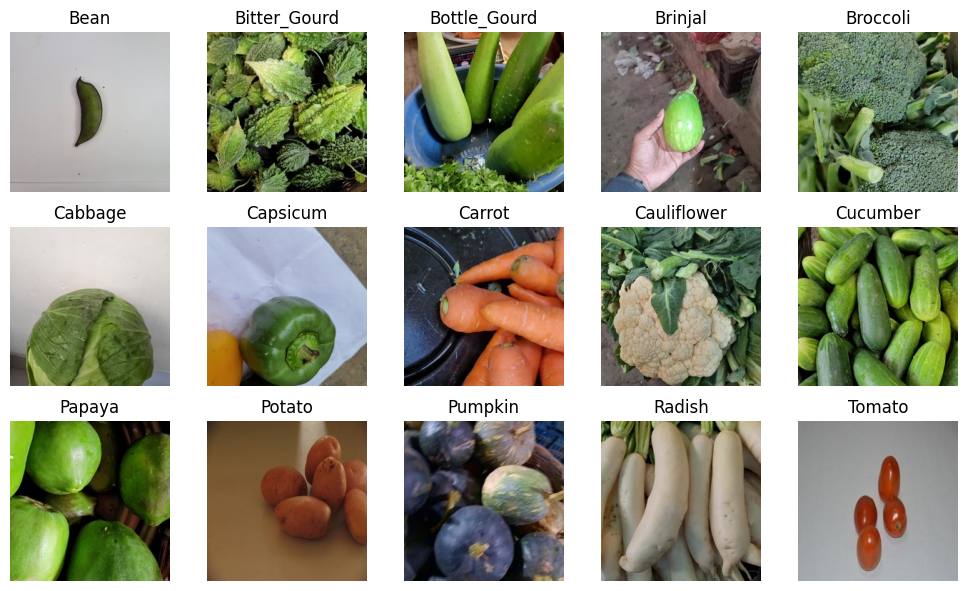

In [5]:
# Retrieve the list of classes
image_categories = os.listdir(train_path)

def plot_images(image_categories):
    plt.figure(figsize=(10, 6))

    for i, cat in enumerate(image_categories):
        image_path = f"{train_path}/{cat}"
        images_inFolder = os.listdir(image_path)
        firstImage_inFolder = images_inFolder[0]
        firstImage_path = f"{image_path}/{firstImage_inFolder}"

        # Load images
        img = tf.keras.utils.load_img(firstImage_path)
        # Normalise the pixel values to the range 0 to 1
        img_arr = tf.keras.utils.img_to_array(img)/255.0

        # Create subplots and plot images
        plt.subplot(3, 5, i+1)
        plt.imshow(img_arr)
        plt.title(cat)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_images(image_categories)

**Observations**
- There are 15 types of vegetables as labels.
- Data augmentation like image rotation can help for a better prediction.
- Some images like bean and tomato above are quite zoomed out, so zooming in can help with a better prediction.
- Images do not seem to be mislabelled according to the sample of images.

### Class Distribution
- Look at the distribution of images for each class in each dataset

In [6]:
def get_label_counts(image_categories, path):
    # Returns classes and their counts
    label_counts={}

    for class_name in image_categories:
        image_path = f"{path}/{class_name}"
        images_inFolder = os.listdir(image_path)

        label_counts[class_name] = len(images_inFolder)
    return label_counts

In [7]:
# Train set
train_label_counts = get_label_counts(image_categories, train_path)

print("No of Labels in Train Set:")
for class_name, count in train_label_counts.items():
    print(f"{class_name}: {count}")

No of Labels in Train Set:
Bean: 780
Bitter_Gourd: 720
Bottle_Gourd: 441
Brinjal: 868
Broccoli: 750
Cabbage: 503
Capsicum: 351
Carrot: 256
Cauliflower: 587
Cucumber: 812
Papaya: 566
Potato: 377
Pumpkin: 814
Radish: 248
Tomato: 955


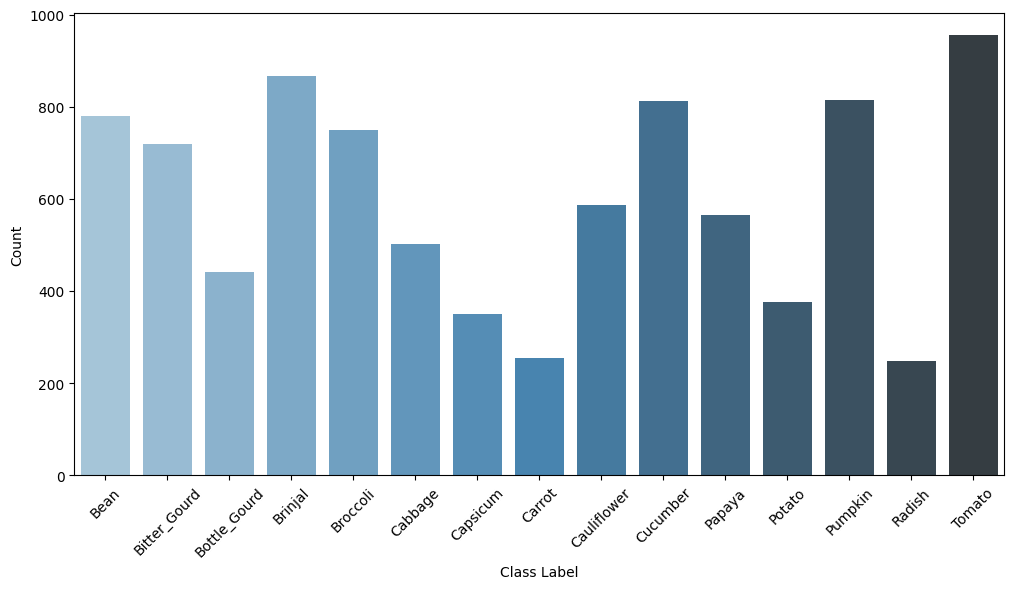

In [8]:
# Display count in a barplot
class_name = list(train_label_counts.keys())
counts = list(train_label_counts.values())

plt.figure(figsize=(12, 6))
sns.barplot(hue=class_name, y=counts, x=class_name, legend=False, palette="Blues_d")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.xticks(rotation=45)

plt.show()

In [9]:
# Validation set
validation_label_counts = get_label_counts(image_categories, val_path)

print("No of Labels in Validation Set:")
for class_name, count in validation_label_counts.items():
    print(f"{class_name}: {count}")

No of Labels in Validation Set:
Bean: 200
Bitter_Gourd: 200
Bottle_Gourd: 200
Brinjal: 200
Broccoli: 200
Cabbage: 200
Capsicum: 200
Carrot: 200
Cauliflower: 200
Cucumber: 200
Papaya: 200
Potato: 200
Pumpkin: 200
Radish: 200
Tomato: 200


In [10]:
# Test set
test_label_counts = get_label_counts(image_categories, test_path)

print("No of Labels in Test Set:")
for class_name, count in test_label_counts.items():
    print(f"{class_name}: {count}")

No of Labels in Test Set:
Bean: 200
Bitter_Gourd: 200
Bottle_Gourd: 200
Brinjal: 200
Broccoli: 200
Cabbage: 200
Capsicum: 200
Carrot: 200
Cauliflower: 200
Cucumber: 200
Papaya: 200
Potato: 200
Pumpkin: 200
Radish: 200
Tomato: 200


**Observations**
- There are unbalanced images in training set
- Equal number of images in validation and testing set

### Image Pixel Distribution
- Helps understand how pixel values are distributed across the images

In [11]:
# Function to retrieve the dimensions of the images
def get_pixels(file):
    im = Image.open(file)
    arr = np.array(im)
    h,w,d = arr.shape
    return h, w, d

Unique Dimensions for Bean:
224x224

Unique Dimensions for Bitter_Gourd:
224x224
205x224
200x224

Unique Dimensions for Bottle_Gourd:
224x224

Unique Dimensions for Brinjal:
224x224

Unique Dimensions for Broccoli:
224x224

Unique Dimensions for Cabbage:
224x224

Unique Dimensions for Capsicum:
224x224

Unique Dimensions for Carrot:
224x224

Unique Dimensions for Cauliflower:
224x224

Unique Dimensions for Cucumber:
224x224

Unique Dimensions for Papaya:
224x224
198x224
210x224

Unique Dimensions for Potato:
224x224

Unique Dimensions for Pumpkin:
224x224

Unique Dimensions for Radish:
224x224

Unique Dimensions for Tomato:
224x224



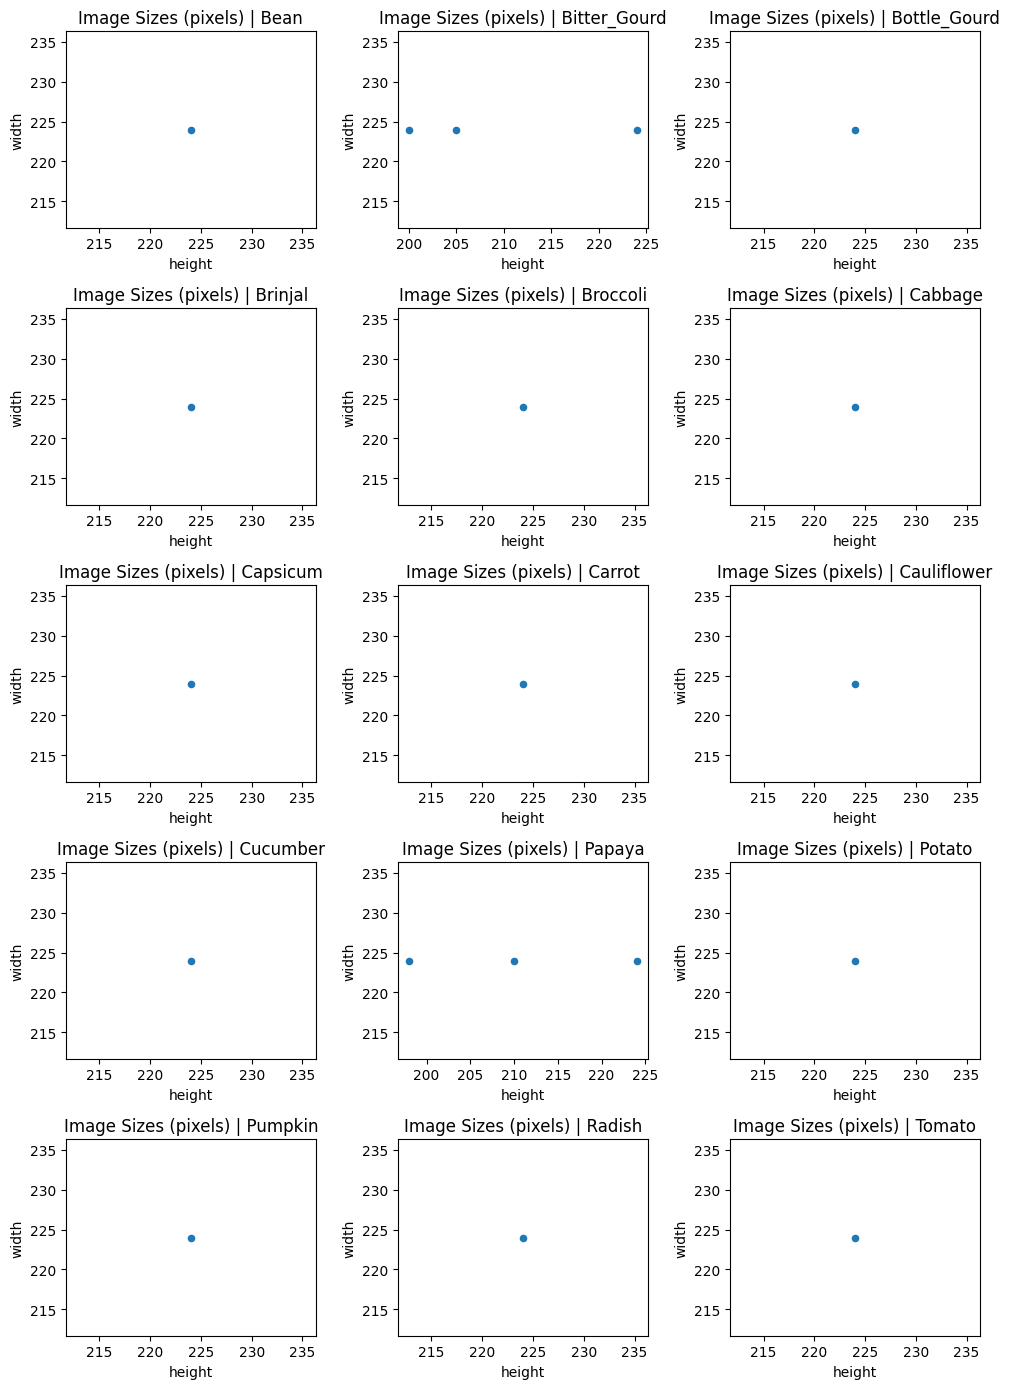

In [12]:
fig, axes = plt.subplots(5, 3, figsize=(10, 14))
axes = axes.ravel()

for i, class_name in enumerate(image_categories):
    image_path = f"{train_path}/{class_name}"
    fileList = [f"{image_path}/{file}" for file in os.listdir(image_path)]

    # Retrieve the dimensions of the images
    dims = [get_pixels(file) for file in fileList]
    dim_df = pd.DataFrame(dims, columns=["height", "width", "depth"])
    
    # Get the unique dimension values for the current class
    unique_dims = dim_df[["height","width"]].drop_duplicates()
    unique_dims_str = [f"{height}x{width}" for height, width in unique_dims.values]
    print(f"Unique Dimensions for {class_name}:")
    string = "\n".join(unique_dims_str)
    print(string)
    print()

    # Plot the scatterplot to demonstrate the image size
    ax = axes[i]
    sizes = dim_df.groupby(["height","width"]).size().reset_index().rename(columns={0:"count"})
    sizes.plot.scatter(x="height", y="width", ax=ax)
    ax.set_title(f"Image Sizes (pixels) | {class_name}")
    plt.tight_layout()
plt.show()

**Observation**
- Only some images from bitter gourd and papaya has other pixel dimensions.
- The other classes only have images that are 224x224.

### Image Averaging
- Calculates the average image for each class within a set of image categories
- Helps in understand the typical appearance of images in each class

In [13]:
# Making (n x m) images
def img2np(path, list_of_filename, size=(64, 64)):
    # Store image arrays
    img_list = []

    for fn in list_of_filename:
        filepath = f"{path}/{fn}"
        # Load images
        current_img = tf.keras.utils.load_img(filepath, target_size=size, color_mode="grayscale")
        img_arr = tf.keras.utils.img_to_array(current_img)
        img_list.append(img_arr)
    
    # Convert to numPy array
    full_mat = np.array(img_list)
    return full_mat

In [14]:
def calculate_avg_img(image_categories, train_dir):
    average_images={}
    for cat in image_categories:
        image_path = f"{train_dir}/{cat}"
        # Retrieve list of images in each class folder
        images_inFolder = os.listdir(image_path)

        # Get the list of images for the current class
        class_images = img2np(image_path, images_inFolder)

        # Get the average image by taking the mean along axis 0
        average_image = np.mean(class_images, axis=0)
        average_images[cat] = average_image

    return average_images

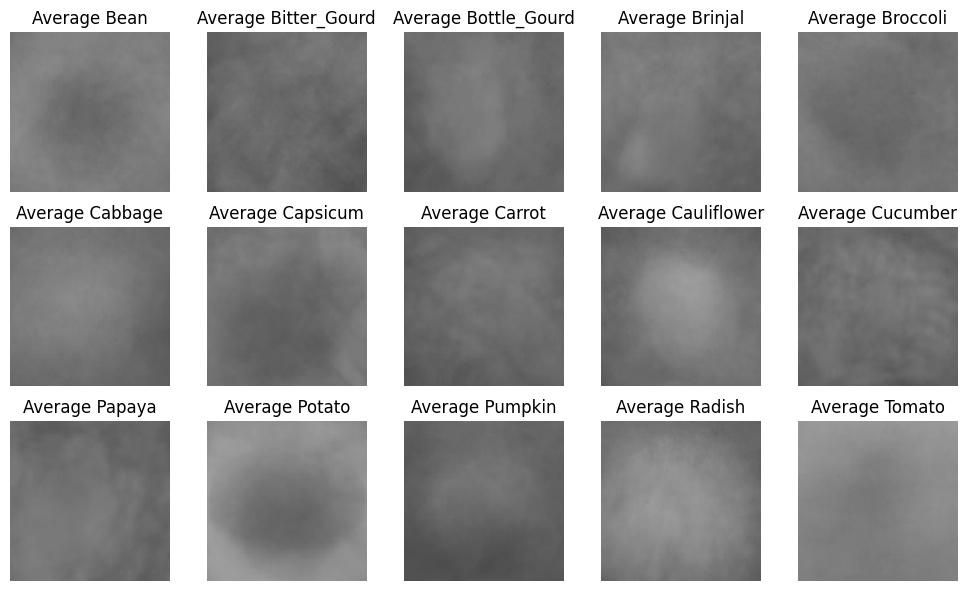

In [15]:
# Calculate the average image for each class
average_images = calculate_avg_img(image_categories, train_path)

# Plot the average images
plt.figure(figsize=(10, 6))
for i, (cat, avg_img) in enumerate(average_images.items()):
    plt.subplot(3, 5, i+1)
    plt.imshow(avg_img.squeeze(), cmap="gray", vmin=0, vmax=255)
    plt.title(f"Average {cat}")
    plt.axis('off')

plt.tight_layout()
plt.show()

**Observation**
- The average image of each class label is not very clear to view and predict what each image portrays
- Caused by the different orientation of each image, as well as the background of the main object, hence model might have a hard time trying to find features to map to the different images.

### Extract Image (Grayscale: 31x31)
- Retrieval of training images of certain dimensions and channel

In [16]:
# Loading data
def load_data(directory, img_height, img_width, colormode, batch_size, seed):
    data = tf.keras.preprocessing.image_dataset_from_directory(
        directory=directory,
        image_size=(img_height, img_width),
        color_mode=colormode,
        batch_size=batch_size, 
        seed = seed
    )
    return data

In [17]:
# Load train data
train_data_31 = load_data(train_path, 31, 31, "grayscale", 10, 42)

Found 9028 files belonging to 15 classes.


In [18]:
# Load validation data
val_data_31 = load_data(val_path, 31, 31, "grayscale", 10, 42)

Found 3000 files belonging to 15 classes.


In [19]:
# Load test data
test_data_31 = load_data(test_path, 31, 31, "grayscale", 10, 42)

Found 3000 files belonging to 15 classes.


#### Visualising the Dataset
- Randomly showcase a 31x31 grayscale image from each label

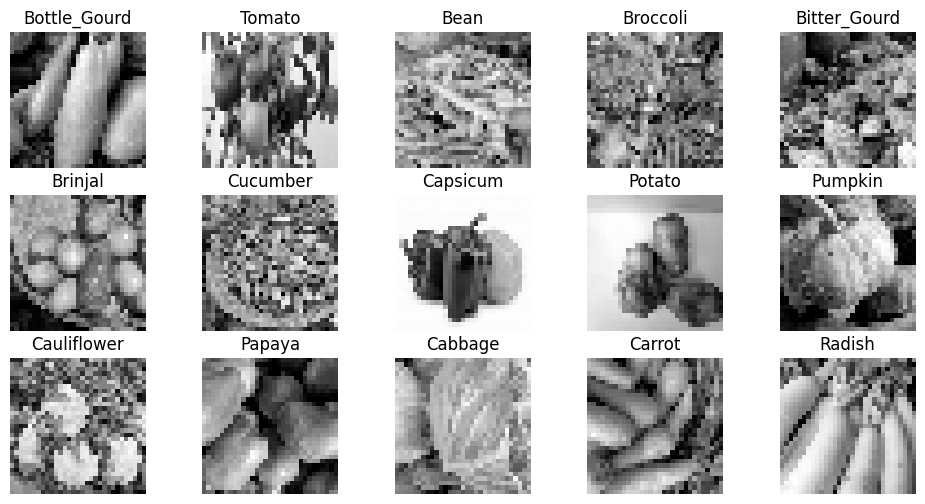

In [20]:
def visualise_images(dataset, num_classes, classes, num_images_per_row = 5):
    plt.figure(figsize=(12, 6))
    unique_labels = []
    for image, label in dataset:
        if label[0].numpy() not in unique_labels:
            unique_labels.append(label[0].numpy())
            plt.subplot(num_classes//num_images_per_row, num_images_per_row, len(unique_labels))
            plt.imshow(image[0].numpy().squeeze(), cmap="gray")
            plt.title(f"{classes[label[0].numpy()]}")
            plt.axis('off')

            if len(unique_labels) == num_classes:
                break
    plt.show()

# Determine the number of classes
classes = train_data_31.class_names
num_classes = len(classes)

# Visualise the images
visualise_images(train_data_31, num_classes, classes)

### Extract Image (Grayscale: 128x128)
- Retrieval of training images of certain dimensions and channel

In [21]:
# Load train data
train_data_128 = load_data(train_path, 128, 128, "grayscale", 10, 42)

Found 9028 files belonging to 15 classes.


In [22]:
# Load validation data
val_data_128 = load_data(val_path, 128, 128, "grayscale", 10, 42)

Found 3000 files belonging to 15 classes.


In [23]:
# Load test data
test_data_128 = load_data(test_path, 128, 128, "grayscale", 10, 42)

Found 3000 files belonging to 15 classes.


#### Visualising the Dataset
- Randomly showcase a 128x128 grayscale image from each label

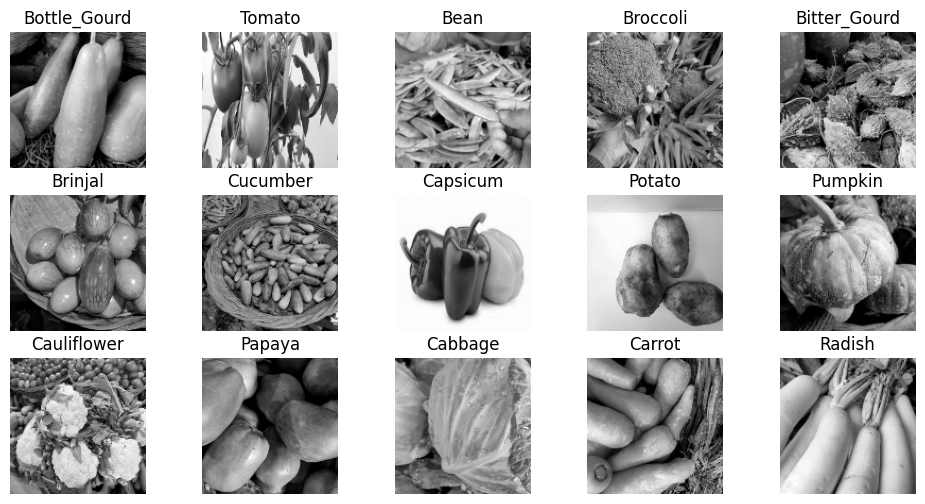

In [24]:
# Determine the number of classes
classes = train_data_128.class_names
num_classes = len(classes)

# Visualise the images
visualise_images(train_data_128, num_classes, classes)

# 2) Feature Engineering

### Normalisation
- Normalise inputs from 0 to 1, leading to faster convergence using the Rescaling layer
- Helps optimize the algorithm to better converge during gradient descent

In [25]:
# Normalise the data within the range of 0 and 1
normalised_data = Sequential(
    name = "normalised_data",
    layers = [
        Rescaling(1./255),  # Normalised values within the range of 0 and 1
    ]
)

This will be added to the first layer of every model.

### Loss Function - Sparse Categorical Cross Entropy (~~One Hot Encoding~~)
- For multi-class classification, categorical cross entropy is used.
- Instead of one hot encoding, sparse categorical crossentropy is used as the labels are provided as integers:
  - For one hot encoding, each class label is represented as a binary vector with a 1 at the index corresponding to the class and 0s elsewhere. Many classes lead to large, sparse vectors. Example, 100 classes mean 99 zeros and only one 1.
  - For sparse categorical cross entropy, they can handle classification tasks with integer labels directly. Takes the model's predicted probability distribution over classes.

### Data Augmentation
- To address the problem of class imbalance, I will augmented the current existing data to generate more training data such that every class will contain the same number of labels.
- Need to reload the train and test data again in batch size of None so all images will get accounted for.

In [26]:
# Reload train data
train_data_31V2 = load_data(train_path, 31, 31, "grayscale", None, 42)

train_data_128V2 = load_data(train_path, 128, 128, "grayscale", None, 42)

Found 9028 files belonging to 15 classes.
Found 9028 files belonging to 15 classes.


In [27]:
# Create a list of images and labels
data_split = [(img.numpy(), classes[labels]) for img, labels in train_data_31V2]

# Convert the list to numpy arrays
X_train_31 = np.array([img for img, label in data_split])
y_train_31 = np.array([label for img, label in data_split])
print(X_train_31.shape)
print(y_train_31.shape)

(9028, 31, 31, 1)
(9028,)


In [28]:
# Create a list of images and labels
data_split = [(img.numpy(), classes[labels]) for img, labels in train_data_128V2]

# Convert the list to numpy arrays
X_train_128 = np.array([img for img, label in data_split])
y_train_128 = np.array([label for img, label in data_split])
print(X_train_128.shape)
print(y_train_128.shape)

(9028, 128, 128, 1)
(9028,)


In [29]:
# Split the data by classes
def split_data_by_classes(X_train, y_train):
    class_data = {}
    for class_label in classes:
        class_indices = np.where(y_train == class_label)[0]
        class_data[class_label] = X_train[class_indices]
    return class_data

# Determine the class max size
def get_max_class_size(class_data):
    max_class_size = max(len(class_images) for class_images in class_data.values())
    print(f"Max class size: {max_class_size}")
    return max_class_size

# Upsample the data to resolve the issue of class imbalance
def upsample_class_with_augmentation(class_data, datagen):
    augmented_images = []
    augmented_labels = []
    max_class_size = get_max_class_size(class_data)
    for class_label, class_images in class_data.items():

        # Set seed for reproducibility to fit the data generator to the images
        datagen.fit(class_images,augment=True, seed=42)

        # Generate augmented images and labels until reaching maximum class size
        generator =datagen.flow(
            class_images, 
            y=np.full((len(class_images),),class_label),
            seed = 42,
            batch_size=len(class_images))
        batch_images, batch_labels = generator.next()
        
        # Repeat data until reaching maximum class size
        while len(batch_images) < max_class_size:
            additional_images, additional_labels = generator.next()
            batch_images = np.concatenate([batch_images, additional_images])
            batch_labels = np.concatenate([batch_labels, additional_labels])

        # Append to lists until max class size is reached
        augmented_images.append(batch_images[:max_class_size])
        augmented_labels.append(batch_labels[:max_class_size])

    # Combine the augmented data for all classes
    augmented_images = np.concatenate(augmented_images)
    augmented_labels = np.concatenate(augmented_labels)
    
    # Shuffle the data
    shuffle_indices = np.arange(len(augmented_labels))
    np.random.seed(42)
    np.random.shuffle(shuffle_indices)

    augmented_images = augmented_images[shuffle_indices]
    augmented_labels = augmented_labels[shuffle_indices]

    return augmented_images, augmented_labels

#### Solve Class Imbalance - 128 x 128 images
- Types of Augmentation done for 128 x 128 images:
  - **Rotation**: Allow image to be rotated in the range of -20 to +20 degrees to help the model become invariant to the orientation of objects in the images. Avoid excessive distortion while model learn from images
  - **Zoom**: Allow image to be zoomed in or out by up to 20% to allow for moderate zooming without distorting the images too much
  - **Shear**: Shifting one part of the image of a maximum magnitude of 20%, keeping the rest stationary as it introduces deformations to the images, helping the model become more robust to different shapes
  - **Horizontal Flip**: Images may be horizontally flipped with a 50% probability to increase the variability in the dataset.
  - **Fill Mode - Reflect**: Smoothly fill in new pixels created during rotations or other transformations, prevent the introduction of sharp edges or artificial patterns

In [30]:
# Augment the images (128 x 128)
datagen = ImageDataGenerator(
    rotation_range=20, # rotation
    zoom_range=0.2, # zoom
    shear_range=0.2, # shear
    horizontal_flip=True, # horizontal flip
    fill_mode = "reflect" # fill mode
)

class_data_128 = split_data_by_classes(X_train_128, y_train_128)
augmented_images_128, augmented_labels_128 = upsample_class_with_augmentation(class_data_128, datagen)

Max class size: 955


In [31]:
# Check number of samples in each class
for class_label, class_images in class_data_128.items():
    num_samples_before_augmentation = len(class_images)
    num_samples_after_augmentation = len(augmented_labels_128[augmented_labels_128 == class_label])
    print(f"Class {class_label}: {num_samples_after_augmentation} samples after augmentation (originally {num_samples_before_augmentation} samples)")

Class Bean: 955 samples after augmentation (originally 780 samples)
Class Bitter_Gourd: 955 samples after augmentation (originally 720 samples)
Class Bottle_Gourd: 955 samples after augmentation (originally 441 samples)
Class Brinjal: 955 samples after augmentation (originally 868 samples)
Class Broccoli: 955 samples after augmentation (originally 750 samples)
Class Cabbage: 955 samples after augmentation (originally 503 samples)
Class Capsicum: 955 samples after augmentation (originally 351 samples)
Class Carrot: 955 samples after augmentation (originally 256 samples)
Class Cauliflower: 955 samples after augmentation (originally 587 samples)
Class Cucumber: 955 samples after augmentation (originally 812 samples)
Class Papaya: 955 samples after augmentation (originally 566 samples)
Class Potato: 955 samples after augmentation (originally 377 samples)
Class Pumpkin: 955 samples after augmentation (originally 814 samples)
Class Radish: 955 samples after augmentation (originally 248 sampl

In [32]:
#Conversion to tensor
class_to_index = {class_name: index for index, class_name in enumerate(classes)}
class_label_int = np.array([class_to_index[label] for label in augmented_labels_128])
train_128V2 = tf.data.Dataset.from_tensor_slices((augmented_images_128, class_label_int))
print(class_label_int.shape)
print(augmented_images_128.shape)

(14325,)
(14325, 128, 128, 1)


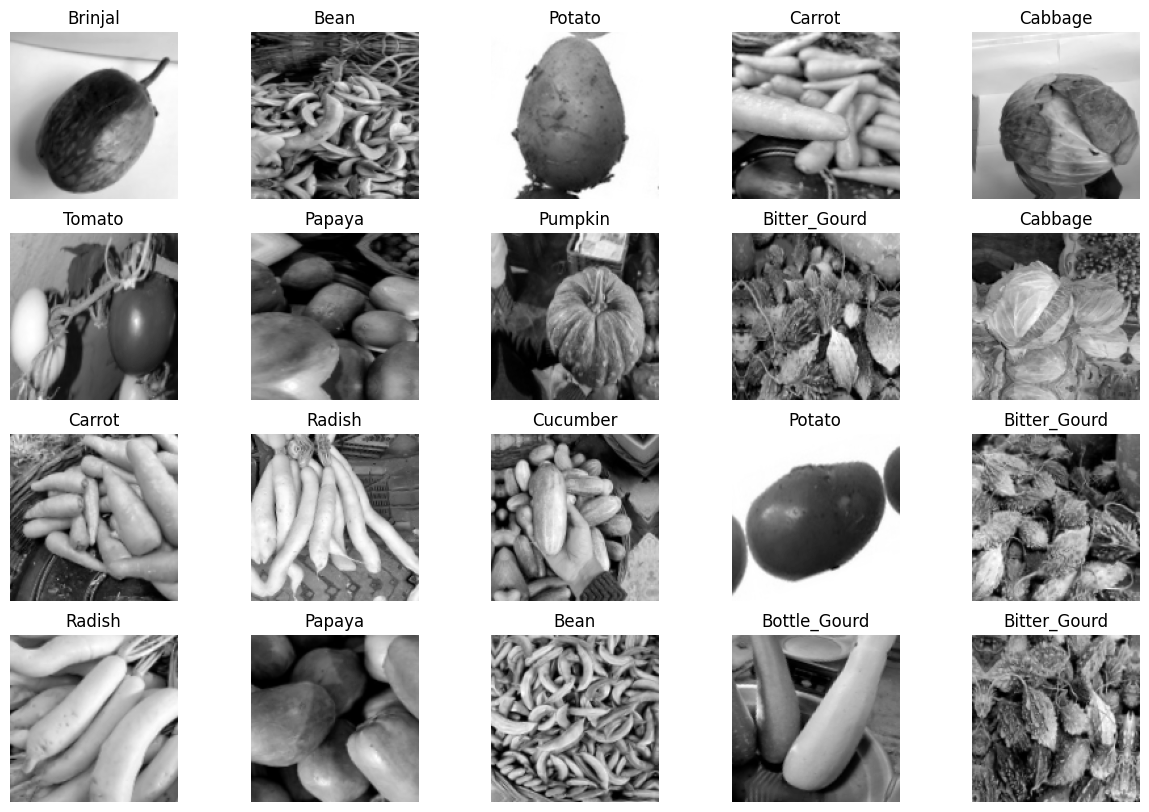

In [33]:
# Visualise the first few 20 images
plt.figure(figsize=(15, 10))

for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(augmented_images_128[i].squeeze(), cmap="gray")
    plt.title(augmented_labels_128[i])
    plt.axis('off')
plt.show()

#### Solve Class Imbalance - 31 x 31 images
  - **Rotation**: Allow image to be rotated in the range of -10 to +10 degrees to help the model become invariant to the orientation of objects in the images. Avoid excessive distortion while model learn from images
  - **Shear**: Shifting one part of the image of a maximum magnitude of 10%, keeping the rest stationary as it introduces deformations to the images, helping the model become more robust to different shapes
  - **Horizontal Flip**: Images may be horizontally flipped with a 50% probability to increase the variability in the dataset.
  - **Fill Mode - Reflect**: Smoothly fill in new pixels created during rotations or other transformations, prevent the introduction of sharp edges or artificial patterns

In [34]:
# Augment the images (31 x 31)
datagen31 = ImageDataGenerator(
    rotation_range=10, # rotation
    shear_range=0.1, # shear
    horizontal_flip=True, # horizontal flip
    fill_mode = "reflect" # fill mode
)

class_data_31 = split_data_by_classes(X_train_31, y_train_31)
augmented_images_31, augmented_labels_31 = upsample_class_with_augmentation(class_data_31, datagen31)

Max class size: 955


In [35]:
# Check number of samples in each class
for class_label, class_images in class_data_31.items():
    num_samples_before_augmentation = len(class_images)
    num_samples_after_augmentation = len(augmented_labels_31[augmented_labels_31 == class_label])
    print(f"Class {class_label}: {num_samples_after_augmentation} samples after augmentation (originally {num_samples_before_augmentation} samples)")

Class Bean: 955 samples after augmentation (originally 780 samples)
Class Bitter_Gourd: 955 samples after augmentation (originally 720 samples)
Class Bottle_Gourd: 955 samples after augmentation (originally 441 samples)
Class Brinjal: 955 samples after augmentation (originally 868 samples)
Class Broccoli: 955 samples after augmentation (originally 750 samples)
Class Cabbage: 955 samples after augmentation (originally 503 samples)
Class Capsicum: 955 samples after augmentation (originally 351 samples)
Class Carrot: 955 samples after augmentation (originally 256 samples)
Class Cauliflower: 955 samples after augmentation (originally 587 samples)
Class Cucumber: 955 samples after augmentation (originally 812 samples)
Class Papaya: 955 samples after augmentation (originally 566 samples)
Class Potato: 955 samples after augmentation (originally 377 samples)
Class Pumpkin: 955 samples after augmentation (originally 814 samples)
Class Radish: 955 samples after augmentation (originally 248 sampl

In [36]:
#Conversion to tensor
class_to_index = {class_name: index for index, class_name in enumerate(classes)}
class_label_int = np.array([class_to_index[label] for label in augmented_labels_31])
train_31V2 = tf.data.Dataset.from_tensor_slices((augmented_images_31, class_label_int))
print(class_label_int.shape)
print(augmented_images_31.shape)

(14325,)
(14325, 31, 31, 1)


In [37]:
# Visualise the first few 20 images
plt.figure(figsize=(15, 10))

for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(augmented_images_31[i].squeeze(), cmap="gray")
    plt.title(augmented_labels_31[i])
    plt.axis('off')
plt.show()

# 3) Model Selection & Model Evaluation

### Model Building
**Model List (128 x 128 images):**
1. Custom Conv2D Neural Network Model

**Model List (31 x 31 images):**
1. Custom Conv2D Neural Network Model

In [38]:
# Load 128 x 128 data as None to consider all images
train_data_128 = load_data(train_path, 128, 128, "grayscale", None, 42)
val_data_128 = load_data(val_path, 128, 128, "grayscale", None, 42)
test_data_128 = load_data(test_path, 128, 128, "grayscale", None, 42)

Found 9028 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.


In [39]:
# Load 31 x 31 images as batch size None to consider all images
train_data_31 = load_data(train_path, 31, 31, "grayscale", None, 42)
val_data_31 = load_data(val_path, 31, 31, "grayscale", None, 42)
test_data_31 = load_data(test_path, 31, 31, "grayscale", None, 42)

Found 9028 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.


In [40]:
# Plot learning_curve
def plot_learning_curve(history):
    history_df = pd.DataFrame(history)
    epochs = list(range(1,len(history_df)+1))

    fig, ax = plt.subplots(1,2, figsize=(16,6))
    
    # Training loss and validation loss
    ax1=ax[0]
    ax1.plot(epochs, history_df["loss"], label="Training Loss")
    ax1.plot(epochs, history_df["val_loss"], label="Validation Loss")
    ax1.legend()
    ax1.set_ylabel("Loss")
    ax1.set_xlabel("Number of Epochs")
    ax1.set_title("Training and Validation Loss")

    # Training accuracy and validation accuracy
    ax2=ax[1]
    ax2.plot(epochs, history_df["accuracy"], label="Training Accuracy")
    ax2.plot(epochs, history_df["val_accuracy"], label="Validation Accuracy")
    ax2.legend()
    ax2.set_ylabel("Accuracy")
    ax2.set_xlabel("Number of Epochs")
    ax2.set_title("Training and Validation Accuracy")
    plt.show()

### Early Stopping Callbacks
- Stop training when validation loss is monitor to stop improving to prevent overfitting
- Min delta is the minimum change in the monitored metric to qualify as an improvement, if change is smaller than 1e-2 (0.01), it will not be considered an improvement.
- Patience - number of epochs with no improvement after which training will be stopped.
- If no improvement in validation loss for 10 consecutive epochs, the training will be stopped.

In [41]:
# Initiate callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor = "val_loss",
        min_delta=1e-2,
        patience=10,
        verbose=1
    )
]

### Conv2D Neural Network Model
- A CNN architecture is well built for image processing as they can effectively extract features from images and learn to recognise patterns, making it suitable for tasks such as object detection, image segmentation and classification.
- Key Layers:
  - Convolutional Layers: Involves sliding a small filter (kernel) over the input to detect features. Conv layers capture local patterns and hierarchical features in the data.
  - Pooling Layers: Downsample the feature maps generated by the convolutional layers. Reduces the spatial dimensions of the data, making the model more robust to variations in position and scale. (Examples: Max-pooling and Average-pooling)
  - Fully Connected Layers: One or more fully connected layers are used to perform high-level reasoning and classification. Layers connect every neuron to every neuron in the previous and subsequent layers, allowing the model to learn complex patterns.
  - Activation Function: Introduces non-linearity into the model. Common functions include: ReLU (Rectified Linear Unit), sigmoid and tanh.
  - Dropout: Regularization technique that randomly drops a fraction of neurons during training to prevent overfitting.
  - Flatten Layer: Used to reshape the data into a 1D vector before passing it to the fully connected layers.
  - Output Layer: Has as many neurons as there are classes. Activation function depends on the problem type. Example, Softmax is commonly used for multi-class classification.
  - Loss Function: Choice of loss function depends on the task. For classification, cross-entropy loss is often used. For regression, mean squared error is commonly used.

- Padding - addition of pixels to the edge of the image
  - Pixels on the edge of the input are only ever exposed to the edge of the filter hence padding can be used to resolved this issue.
  - Padding of value 'same' calculates and adds the padding required to the input image to ensure that the output has the same shape as the input.

- Stride - Amount of movement between applications of the filter to the input image

### Training without Data Augumentation
- We will start by fitting the unaugumented data (imbalanced class) to the model as training. 

#### 128 x 128 images

**Baseline Model (128 x 128)**
- To start off, this is my baseline model which I will use to compare the loss and accuracy with the other models.

In [118]:
# Try for 128 x 128 images
tf.keras.backend.clear_session()

Conv2D_128_Baseline = Sequential(
    name = "Conv2D_128_Baseline",
    layers = [
        normalised_data,
        Conv2D(32, (3, 3),input_shape=(128,128,1), activation='relu', padding='same', strides = (4,4)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu', padding='same', strides=(2,2)),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu', padding='same', strides=(1,1)),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu', padding='same', strides=(1,1)),
        MaxPooling2D((2, 2)),

        Flatten(),

        Dense(128, activation='relu'),
        Dropout(0.6),

        Dense(num_classes, activation='softmax')
    ]
)

# Compile model
opt = Adam(learning_rate=0.0009)
Conv2D_128_Baseline.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Conv2D_128_Baseline.build(input_shape=(None, 128, 128, 1))

Conv2D_128_Baseline_history = Conv2D_128_Baseline.fit(
    train_data_128.batch(10), 
    epochs=100,
    validation_data=val_data_128.batch(10)
    )

Epoch 1/100
903/903 [==============================] - 6s 6ms/step - loss: 2.4034 - accuracy: 0.1880 - val_loss: 2.0984 - val_accuracy: 0.2967
Epoch 2/100
903/903 [==============================] - 5s 6ms/step - loss: 1.8910 - accuracy: 0.3937 - val_loss: 1.6664 - val_accuracy: 0.4640
Epoch 3/100
903/903 [==============================] - 5s 6ms/step - loss: 1.4737 - accuracy: 0.5332 - val_loss: 1.3177 - val_accuracy: 0.5640
Epoch 4/100
903/903 [==============================] - 5s 6ms/step - loss: 1.0816 - accuracy: 0.6552 - val_loss: 0.9549 - val_accuracy: 0.6987
Epoch 5/100
903/903 [==============================] - 5s 6ms/step - loss: 0.7975 - accuracy: 0.7502 - val_loss: 0.7312 - val_accuracy: 0.7703
Epoch 6/100
903/903 [==============================] - 5s 5ms/step - loss: 0.6206 - accuracy: 0.8079 - val_loss: 0.6366 - val_accuracy: 0.8090
Epoch 7/100
903/903 [==============================] - 5s 6ms/step - loss: 0.4746 - accuracy: 0.8499 - val_loss: 0.6253 - val_accuracy: 0.8190

In [119]:
Conv2D_128_Baseline.summary()

Model: "Conv2D_128_Baseline"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalised_data (Sequential  (None, None, None, 1)    0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                               

**Observations**
- Model has 258703 trainable parameters.
- Model has 4 Convolutional Layers, 4 Max Pooling layers, 1 Flatten Layer, 1 Droput Layer, 1 Fully Connected Layer and 1 Output Layer.

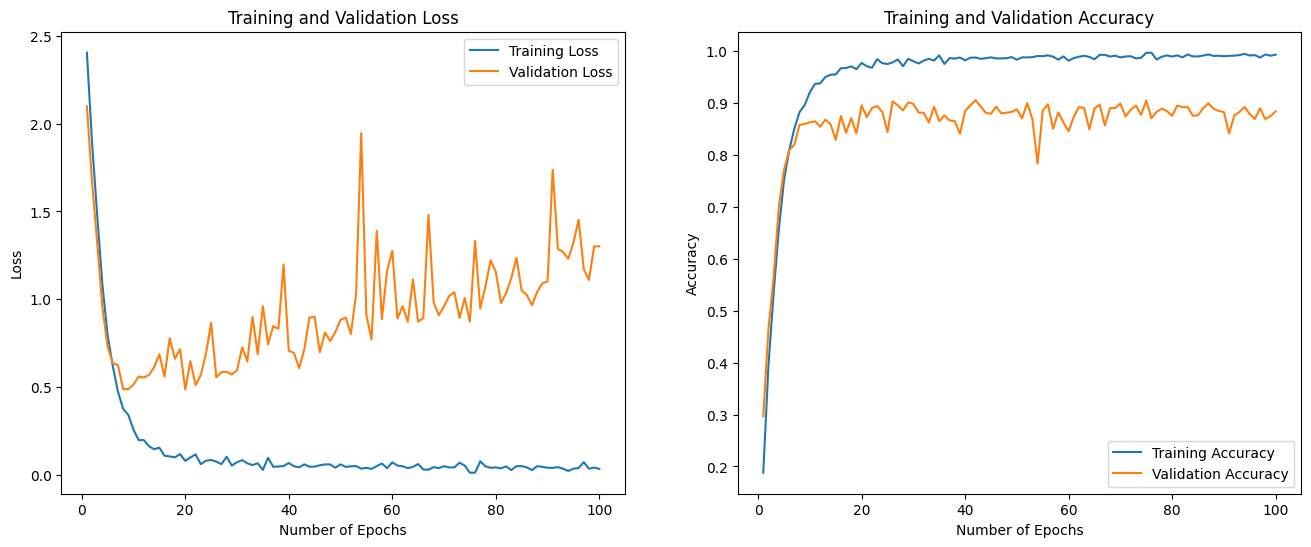

In [120]:
plot_learning_curve(Conv2D_128_Baseline_history.history)

**Observations**
- From the loss curve, as the epochs increased, the loss function generally starts to increase.
- From the accuracy curve, as the epochs increased, the accuracy is fluctuating around 0.80+.
- Both graphs imply that the learning rate might be too high, causing the model to overshoot the minimum of the loss function due to the major fluctuations present in both curves.

In [121]:
Conv2D_128_Baseline.evaluate(test_data_128.batch(10))

300/300 [==============================] - 1s 3ms/step - loss: 1.1186 - accuracy: 0.8940


[1.1186254024505615, 0.8939999938011169]

**Observations**
- This CNN model generated an average loss of 0.88 and an accuracy of 0.86+ when evaluated on test dataset, it can be improved.

**CNN Version 2 (128 x 128)**
- Next attempt to build a model with a lower learning rate, add in strides and more regularisation from the use of the DropOut layers

In [122]:
# Try for 128 x 128 images
tf.keras.backend.clear_session()

Conv2D_128_V2 = Sequential(
    name = "Conv2D_128_V2",
    layers = [
        normalised_data,
        Conv2D(64, (5,5),input_shape=(128,128,1), activation = "relu", padding='same', strides = (4,4)),
        MaxPooling2D((2, 2)),
        Conv2D(128, (5, 5), activation = "relu", padding='same', strides = (2, 2)),
        MaxPooling2D((2, 2)),
        Conv2D(256, (3,3), activation = "relu", padding='same', strides = (1, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(512, (3,3), activation = "relu", padding='same', strides = (1, 1)),
        MaxPooling2D((2, 2)),

        Flatten(),
        Dropout(0.5),

        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dropout(0.5),

        Dense(num_classes, activation='softmax')
    ]
)

# Compile model
opt = Adam(learning_rate=0.00001)
Conv2D_128_V2.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Conv2D_128_V2.build(input_shape=(None, 128, 128, 1))

Conv2D_128_V2_history = Conv2D_128_V2.fit(
    train_data_128.batch(10), 
    epochs=300,
    validation_data=val_data_128.batch(10)
    )

Epoch 1/300
903/903 [==============================] - 6s 7ms/step - loss: 2.6847 - accuracy: 0.0892 - val_loss: 2.7196 - val_accuracy: 0.0667
Epoch 2/300
903/903 [==============================] - 6s 6ms/step - loss: 2.6574 - accuracy: 0.0969 - val_loss: 2.7282 - val_accuracy: 0.0667
Epoch 3/300
903/903 [==============================] - 6s 6ms/step - loss: 2.6561 - accuracy: 0.1005 - val_loss: 2.7235 - val_accuracy: 0.0667
Epoch 4/300
903/903 [==============================] - 6s 6ms/step - loss: 2.6480 - accuracy: 0.1027 - val_loss: 2.7204 - val_accuracy: 0.0667
Epoch 5/300
903/903 [==============================] - 6s 6ms/step - loss: 2.6302 - accuracy: 0.1031 - val_loss: 2.7059 - val_accuracy: 0.0680
Epoch 6/300
903/903 [==============================] - 6s 6ms/step - loss: 2.6000 - accuracy: 0.1133 - val_loss: 2.6450 - val_accuracy: 0.1260
Epoch 7/300
903/903 [==============================] - 6s 6ms/step - loss: 2.5494 - accuracy: 0.1331 - val_loss: 2.5761 - val_accuracy: 0.1270

In [123]:
Conv2D_128_V2.summary()

Model: "Conv2D_128_V2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalised_data (Sequential  (None, None, None, 1)    0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 128)         204928    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 128)        0         
 2D)                                                             
                                                     

**Observations**
- This model definitely has more trainable parameters than the previous model as the number of epochs has increase and the architecture is much deeper

In [124]:
plot_learning_curve(Conv2D_128_V2_history.history)

**Observations**
- This architecture shows that the validation loss only converges at around 0.5+ which is not as low as the training loss when the number of epochs increase.
- Validation accuracy also starts to converge around 0.85+, which is not as ideal as the training accuracy.
- Both the initial loss and accuracy were quite similar in the first few epochs but start to diverge after.

In [125]:
Conv2D_128_V2.evaluate(test_data_128.batch(10))

300/300 [==============================] - 1s 3ms/step - loss: 0.4606 - accuracy: 0.9070


[0.46055060625076294, 0.9070000052452087]

**Observations**
- The test loss and test accuracy are definitely way better than the previous model built.
- However, we can further improve this by using a larger kernel size at first to capture larger spatial features and increase the receptive field, allowing the model to consider more context when making predictions.
- We can also try to increase/widen the fully connected layers or simply increasing the number of units in the FC layer to allow the model capture more intricate rel;ationships and representations.

**CNN Version 3 (128 x 128)**
- Next attempt to build a model by increasing the kernel size, the first fully connected layer and the Dropout layer (Introduces noise during training to help netowork be more robust).
- This can allow the convolutional layer to capture more global information in the input and hopefully help the accuracy and loss to converge towards the training model.

In [126]:
# Try for 128 x 128 images
tf.keras.backend.clear_session()

Conv2D_128_V3 = Sequential(
    name = "Conv2D_128_V3",
    layers = [
        normalised_data,
        Conv2D(64, (7, 7),input_shape=(128,128,1), activation = "relu", padding='same', strides = (4,4)),
        MaxPooling2D((2, 2)),
        Conv2D(128, (5, 5), activation = "relu", padding='same', strides = (2, 2)),
        MaxPooling2D((2, 2)),
        Conv2D(256, (3,3), activation = "relu", padding='same', strides = (1, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(512, (3,3), activation = "relu", padding='same', strides = (1, 1)),
        MaxPooling2D((2, 2)),

        Flatten(),
        Dropout(0.5),

        Dense(1028, activation='relu'),
        Dropout(0.6),
        Dense(128, activation='relu'),
        Dropout(0.6),

        Dense(num_classes, activation='softmax')
    ]
)

# Compile model
opt = Adam(learning_rate=0.00001)
Conv2D_128_V3.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Conv2D_128_V3.build(input_shape=(None, 128, 128, 1))

Conv2D_128_V3_history = Conv2D_128_V3.fit(
    train_data_128.batch(10), 
    epochs=300,
    validation_data=val_data_128.batch(10)
    )


Epoch 1/300
903/903 [==============================] - 6s 6ms/step - loss: 2.6890 - accuracy: 0.0912 - val_loss: 2.7191 - val_accuracy: 0.0667
Epoch 2/300
903/903 [==============================] - 6s 6ms/step - loss: 2.6674 - accuracy: 0.0967 - val_loss: 2.7212 - val_accuracy: 0.0710
Epoch 3/300
903/903 [==============================] - 6s 6ms/step - loss: 2.6575 - accuracy: 0.0937 - val_loss: 2.7188 - val_accuracy: 0.0903
Epoch 4/300
903/903 [==============================] - 6s 6ms/step - loss: 2.6458 - accuracy: 0.0939 - val_loss: 2.7195 - val_accuracy: 0.0963
Epoch 5/300
903/903 [==============================] - 6s 7ms/step - loss: 2.6353 - accuracy: 0.0943 - val_loss: 2.6966 - val_accuracy: 0.1037
Epoch 6/300
903/903 [==============================] - 6s 7ms/step - loss: 2.6121 - accuracy: 0.1084 - val_loss: 2.6572 - val_accuracy: 0.1670
Epoch 7/300
903/903 [==============================] - 6s 7ms/step - loss: 2.5854 - accuracy: 0.1156 - val_loss: 2.6086 - val_accuracy: 0.1193

**Observations**
- We have increased the number of units in the fully connected network to 1028 for the first Dense layer and also increased the kernel size to (7,7)

In [127]:
Conv2D_128_V3.summary()

Model: "Conv2D_128_V3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalised_data (Sequential  (None, None, None, 1)    0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 64)        3200      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 128)         204928    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 128)        0         
 2D)                                                             
                                                     

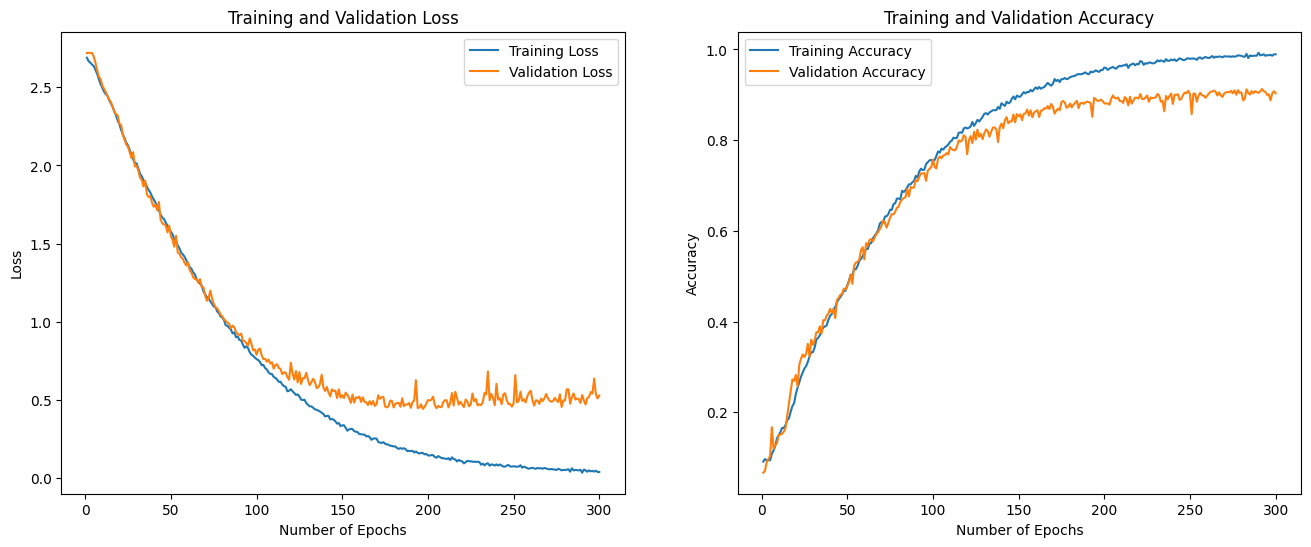

In [128]:
plot_learning_curve(Conv2D_128_V3_history.history)

**Observations**
- For the training and validation loss curve, both were converging quite well with few to none fluctuations and the validation loss curve converge around 0.60+.
- For the training and validation accuracy curve, both were increasing quite well at a steady rate and validation accuracy curve converge around 0.9+.
- Generally, this architecture is well built but I will improve it to see how much better it can do.

In [129]:
Conv2D_128_V3.evaluate(test_data_128.batch(10))

300/300 [==============================] - 1s 3ms/step - loss: 0.5101 - accuracy: 0.9020


[0.5100677013397217, 0.9020000100135803]

**Observations**
- Test accuracy at 0.9 is quite high but we can improve this score.

#### 31 x 31 images

**CNN Version 1 (31 x 31)**
- Since the image resolution is lower, I shall decrease the kernel size to capture more local field instead of the global field.
- I will also increase the fully connected layers units to allow the model to learn complex representations for a higher level of abstraction.

In [108]:
# Try for 31 x 31 images
tf.keras.backend.clear_session()

Conv2D_31 = Sequential(name="Conv2D_31V1",
    layers = [
        normalised_data,
        Conv2D(32, (3, 3),input_shape=(31, 31 ,1), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),

        Flatten(),
        Dropout(0.5),

        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(256, activation='relu'),
        Dropout(0.5),

        Dense(num_classes, activation='softmax')
    ]
)

# Compile model
opt = Adam(learning_rate=0.00001)
Conv2D_31.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Conv2D_31.build(input_shape=(None, 31, 31, 1))

Conv2D_31_history = Conv2D_31.fit(
    train_data_31.batch(10), 
    epochs=200,
    validation_data=val_data_31.batch(10)
    )

Epoch 1/200
903/903 [==============================] - 6s 6ms/step - loss: 2.6977 - accuracy: 0.0814 - val_loss: 2.7108 - val_accuracy: 0.0667
Epoch 2/200
903/903 [==============================] - 5s 5ms/step - loss: 2.6682 - accuracy: 0.0981 - val_loss: 2.7226 - val_accuracy: 0.0667
Epoch 3/200
903/903 [==============================] - 5s 5ms/step - loss: 2.6543 - accuracy: 0.1012 - val_loss: 2.7229 - val_accuracy: 0.0667
Epoch 4/200
903/903 [==============================] - 5s 5ms/step - loss: 2.6473 - accuracy: 0.1008 - val_loss: 2.7160 - val_accuracy: 0.0667
Epoch 5/200
903/903 [==============================] - 5s 5ms/step - loss: 2.6345 - accuracy: 0.1037 - val_loss: 2.7139 - val_accuracy: 0.0663
Epoch 6/200
903/903 [==============================] - 5s 5ms/step - loss: 2.6203 - accuracy: 0.1082 - val_loss: 2.6866 - val_accuracy: 0.0843
Epoch 7/200
903/903 [==============================] - 5s 5ms/step - loss: 2.5887 - accuracy: 0.1191 - val_loss: 2.6383 - val_accuracy: 0.1367

**Observations**
- As you can see, for the model that deals with 31 x 31 images, I have added more layers for the fully connected layers as this will help the neural network greater expressiveness, enabling it to learn and represent more sophisticated features and relationship within the data.
- With a lower pixelated image like 31 x 31, I have to use smaller filters to allow the network to capture more local and fine-grained patterns in the input data, starting from 32 filters.

In [109]:
Conv2D_31.summary()

Model: "Conv2D_31V1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalised_data (Sequential  (None, None, None, 1)    0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 31, 31, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 15, 15, 128)       

**Observations**
- There are more trainable parameters for the 31 x 31 images than the 128 x 128 which may mean the models can still learn more complex and intricate patterns from the training data.

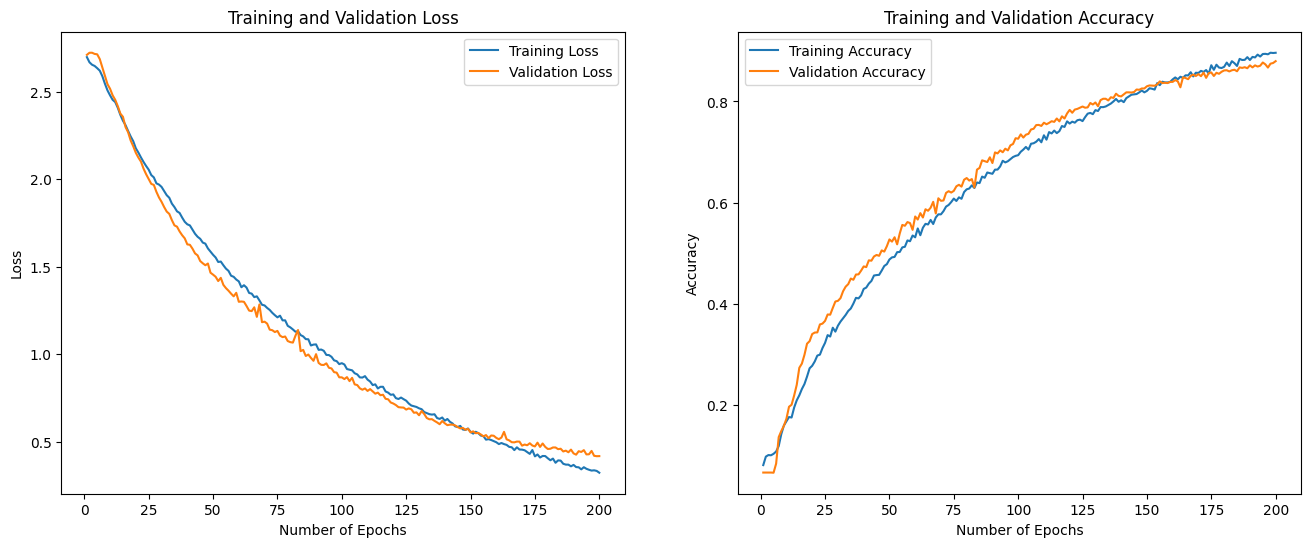

In [110]:
plot_learning_curve(Conv2D_31_history.history)

**Observations**
- From the training and validation loss curve, we can see the validation curve converges quite well around 0.3+ but maybe changing the learning rate and adding regularisation can improve this.
- The validation accuracy is quite high, reaching 0.94, but I think we can improve this model.

In [111]:
Conv2D_31.evaluate(test_data_31.batch(10))

300/300 [==============================] - 1s 2ms/step - loss: 0.3666 - accuracy: 0.8957


[0.3666374981403351, 0.8956666588783264]

**Observations**:
- The test accuracy as expected reaches 0.94, showing that this model is quite good, just need a few improvements.

### Training with Data Augumentation
- Using the same network architecture as before, we shall see if the augmentation of data being upsampled into the existing training data to see if augmentating the data and balancing the data helps the model

#### 128 x 128 images

**CNN Augmented Balance Version 1 (128 x 128)**

In [205]:
# Try for 128 x 128 images
tf.keras.backend.clear_session()

Conv2D_128V1_aug = Sequential(name="Conv2D_128V1_Augmentation",
    layers = [
        normalised_data,
        Conv2D(64, (5, 5), activation='relu', padding='same', input_shape=(128, 128, 1), strides=(4, 4)),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu', padding='same', strides=(1, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu', padding='same', strides=(1, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(256, (3, 3), activation='relu', padding='same', strides=(1, 1)),
        MaxPooling2D((2, 2)),

        Flatten(),
        Dropout(0.5),

        Dense(1024, activation='relu'),
        Dropout(0.5),
        Dense(128, activation = 'relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ]
)

# Compile model
opt = Adam(learning_rate=0.00001)
Conv2D_128V1_aug.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Conv2D_128V1_aug.build(input_shape=(None, 128, 128, 1))

Conv2D_128V1_aug_history = Conv2D_128V1_aug.fit(
    train_128V2.batch(10), 
    epochs=200,
    validation_data=val_data_128.batch(10)
    )

Epoch 1/200
1433/1433 [==============================] - 9s 6ms/step - loss: 2.7083 - accuracy: 0.0704 - val_loss: 2.7057 - val_accuracy: 0.0707
Epoch 2/200
1433/1433 [==============================] - 8s 6ms/step - loss: 2.7064 - accuracy: 0.0711 - val_loss: 2.7036 - val_accuracy: 0.0673
Epoch 3/200
1433/1433 [==============================] - 8s 6ms/step - loss: 2.7045 - accuracy: 0.0753 - val_loss: 2.6963 - val_accuracy: 0.0803
Epoch 4/200
1433/1433 [==============================] - 8s 6ms/step - loss: 2.6884 - accuracy: 0.0966 - val_loss: 2.6332 - val_accuracy: 0.1870
Epoch 5/200
1433/1433 [==============================] - 8s 6ms/step - loss: 2.6021 - accuracy: 0.1331 - val_loss: 2.4680 - val_accuracy: 0.1717
Epoch 6/200
1433/1433 [==============================] - 8s 6ms/step - loss: 2.5252 - accuracy: 0.1493 - val_loss: 2.3945 - val_accuracy: 0.2103
Epoch 7/200
1433/1433 [==============================] - 8s 6ms/step - loss: 2.4813 - accuracy: 0.1636 - val_loss: 2.3479 - val_ac

In [208]:
Conv2D_128V1_aug.summary()

Model: "Conv2D_128V1_Augmentation"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalised_data (Sequential  (None, None, None, 1)    0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                         

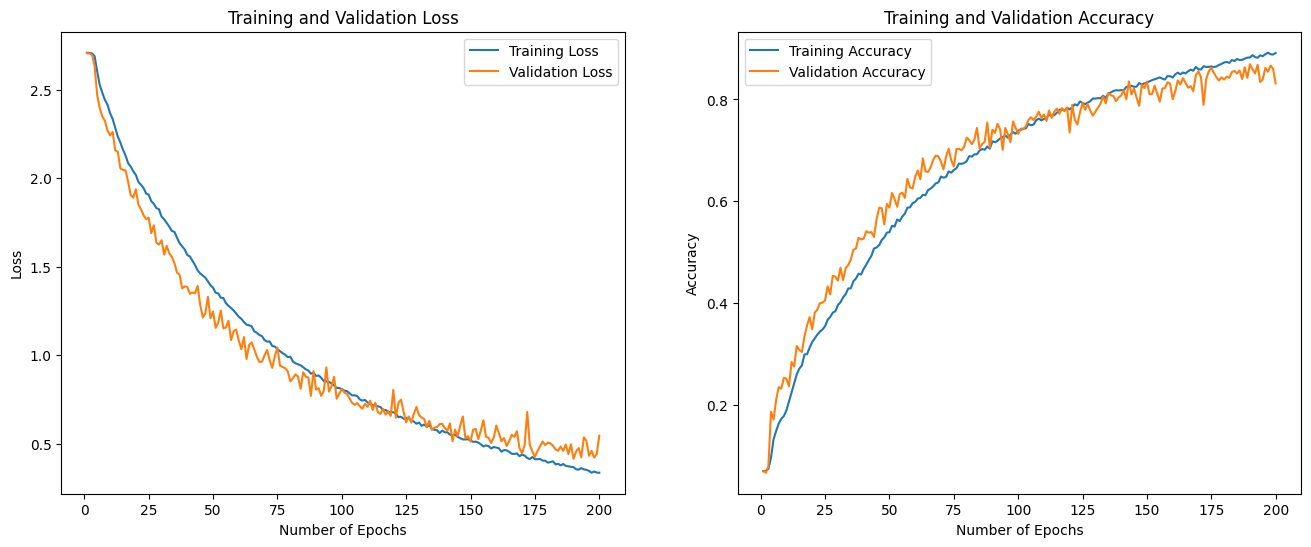

In [206]:
plot_learning_curve(Conv2D_128V1_aug_history.history)

**Observations**
- This model still has room for improvement as the training accuracy only reaches 0.89 hence maybe an increase in epochs or a decrease in learning rate will increase the accuracy.
- Validation loss and accuracy is quite close towards the training loss and accuracy which shows that the model is quite reliable.
- Compared to the unaugmented data, the accuracy curve and loss curve of the validation data does not diverge away from the training curve that much, which shows that augmenting the data does improve the prediction of the model.

In [207]:
Conv2D_128V1_aug.evaluate(test_data_128.batch(10))

300/300 [==============================] - 3s 7ms/step - loss: 0.5392 - accuracy: 0.8360


[0.5391502976417542, 0.8360000252723694]

**Observations**
- Test accuracy of 0.80+ is relatively quite high.

### Transfer Learning - ResNet50
ResNet50 is a CNN that is 50 layers deep, a kind that stacks residual blocks on top of each other to form a network.<br><br>
While deep CNNs gives us the option of adding more layers to the CNNs to solve more complicated tasks in computer vision, it comes with its own set of issues. It has been observed that training the neural networks becomes more difficult with the increase in the number of added layers, and in some cases, the accuracy dwindles as well. 
It is here that the use of ResNet assumes importance. Deeper neural networks are more difficult to train. With Resnet, it becomes possible to surpass the difficulties of training very deep neural networks.<br><br>
For computer vision tasks, experts often add more layers to enhance the model's capability to solve complex problem effectively. The idea is that each layer can be specialized to learn specific features, leading to improved accuracy. However, as the number of layers increases, a phenomenon called "degradation" may occur. This means that, despite having a deeper network, the performance may reach a point where further increases in depth lead to a decline in accuracy on both training and testing data. It may result from various factors such as the initialization of the network parameters, the choice of optimization functions or a serious issue also known as vanishing or exploding gradients.<br><br>
**Vanishing gradient** - Gradient of the loss function become extremely small during back propagation, hindering effective weight updates and learning.<br>
**Exploding gradient** - Excessively large gradients that cause unstable learning.<br>
Read more at: https://viso.ai/deep-learning/resnet-residual-neural-network/


Residual blocks are used in ResNet to improve the accuracy which involves the concept of 'skip connection'.<br>

Skip connections work in two ways. They alleviate the issue of vanishing gradient by setting up an alternate shortcute for the gradient to pass through which enable the model to learn an identity function so that the higher layers of the model do not perform worse than the lower layers. ResNet will thus improve the efficiency of deep neural networks with more neural layers while minimizing percentage of errors.

In [233]:
# Try for 128 x 128 images
tf.keras.backend.clear_session()

ResNet50_128 = Sequential(name="ResNet50_Augmentation",
    layers = [
        ResNet50(
            include_top=False, 
            weights=None, 
            input_shape=(128, 128, 1),
            classifier_activation="softmax"),
        
        GlobalAveragePooling2D(),
        Dropout(0.5),
        Dense(512, activation = 'relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ]
)

# Compile model
opt = Adam(learning_rate=0.0001)
ResNet50_128.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

ResNet50_128.build(input_shape=(None, 128, 128, 1))

ResNet50_128_history = ResNet50_128.fit(
    train_128V2.batch(10), 
    epochs=100,
    validation_data=val_data_128.batch(10)
    )

Epoch 1/100
1433/1433 [==============================] - 43s 28ms/step - loss: 2.7421 - accuracy: 0.1270 - val_loss: 2.2832 - val_accuracy: 0.2473
Epoch 2/100
1433/1433 [==============================] - 39s 27ms/step - loss: 2.1871 - accuracy: 0.2795 - val_loss: 2.0296 - val_accuracy: 0.3910
Epoch 3/100
1433/1433 [==============================] - 39s 27ms/step - loss: 1.8260 - accuracy: 0.4062 - val_loss: 2.3629 - val_accuracy: 0.3747
Epoch 4/100
1433/1433 [==============================] - 38s 27ms/step - loss: 1.5579 - accuracy: 0.4931 - val_loss: 1.3222 - val_accuracy: 0.5787
Epoch 5/100
1433/1433 [==============================] - 38s 27ms/step - loss: 1.3158 - accuracy: 0.5784 - val_loss: 1.2047 - val_accuracy: 0.6577
Epoch 6/100
1433/1433 [==============================] - 38s 27ms/step - loss: 1.0958 - accuracy: 0.6584 - val_loss: 1.1866 - val_accuracy: 0.6640
Epoch 7/100
1433/1433 [==============================] - 39s 27ms/step - loss: 0.8613 - accuracy: 0.7366 - val_loss: 3

In [234]:
ResNet50_128.summary()

Model: "ResNet50_Augmentation"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23581440  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 15)                7695      
                                             

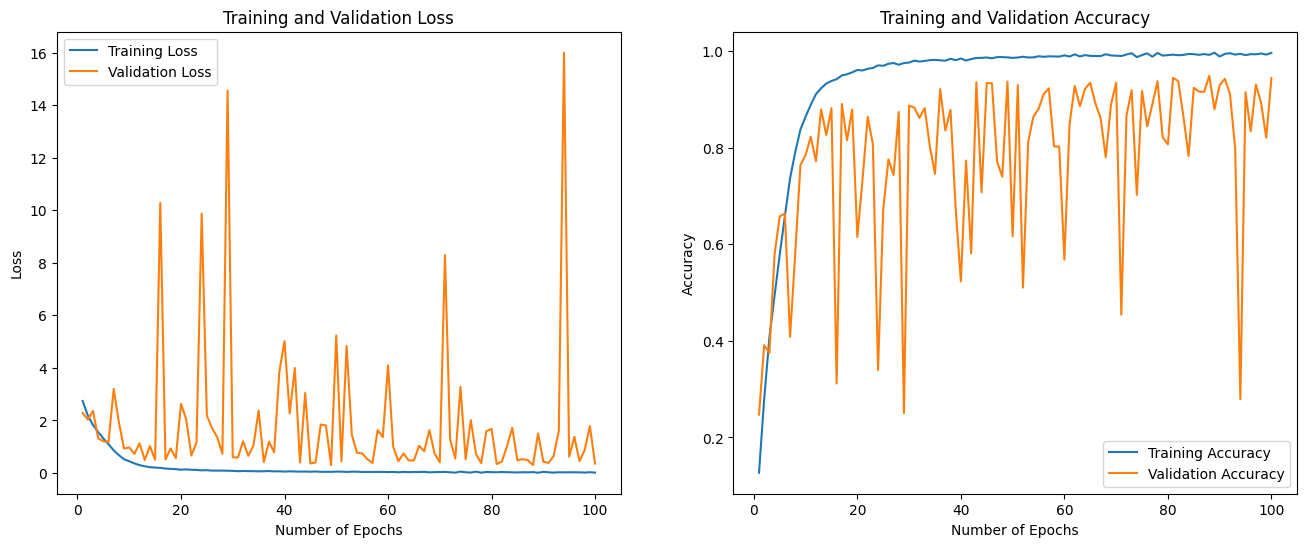

In [235]:
plot_learning_curve(ResNet50_128_history.history)

**Observations**
- ResNet50 shows that the model is too accustomed with the training data where the training accuracy is close to 1.0 and the training loss is apporaching near 0.
- Constant fluctuations can be seen in both the validation curves.
- Requires deeper research if were to implement transfer learning

In [236]:
ResNet50_128.evaluate(test_data_128.batch(10))

300/300 [==============================] - 3s 9ms/step - loss: 0.4457 - accuracy: 0.9417


[0.4457317292690277, 0.9416666626930237]

**Observations**
-  Test accuracy is still high but due to the curve showing fluctuations, we can't use ResNet50.

### 31 x 31 images

**CNN Augmented Balance Version 1 (31 x 31)**

In [48]:
# Try for 31 x 31 images
tf.keras.backend.clear_session()

Conv2D_31_aug = Sequential(name="Conv2D_31_Augmentation",
    layers = [
        normalised_data,
        Conv2D(32, (3, 3),input_shape=(31, 31 ,1), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),

        Flatten(),
        Dropout(0.5),

        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(256, activation='relu'),
        Dropout(0.5),
        # Dense(128, activation='relu'),
        # Dropout(0.5),

        Dense(num_classes, activation='softmax')
    ]
)

# Compile model
opt = Adam(learning_rate=0.0001)
Conv2D_31_aug.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Conv2D_31_aug.build(input_shape=(None, 31, 31, 1))

Conv2D_31_aug_history = Conv2D_31_aug.fit(
    train_31V2.batch(10), 
    epochs=200,
    validation_data=val_data_31.batch(10)
    )

Epoch 1/200
1433/1433 [==============================] - 37s 26ms/step - loss: 2.6103 - accuracy: 0.1169 - val_loss: 2.5959 - val_accuracy: 0.1560
Epoch 2/200
1433/1433 [==============================] - 37s 26ms/step - loss: 2.2159 - accuracy: 0.2665 - val_loss: 2.0890 - val_accuracy: 0.3087
Epoch 3/200
1433/1433 [==============================] - 37s 26ms/step - loss: 1.9160 - accuracy: 0.3652 - val_loss: 1.7975 - val_accuracy: 0.4023
Epoch 4/200
1433/1433 [==============================] - 37s 26ms/step - loss: 1.6669 - accuracy: 0.4566 - val_loss: 1.6381 - val_accuracy: 0.4637
Epoch 5/200
1433/1433 [==============================] - 35s 25ms/step - loss: 1.4602 - accuracy: 0.5303 - val_loss: 1.6507 - val_accuracy: 0.4780
Epoch 6/200
1433/1433 [==============================] - 35s 24ms/step - loss: 1.2915 - accuracy: 0.5824 - val_loss: 1.3950 - val_accuracy: 0.5593
Epoch 7/200
1433/1433 [==============================] - 35s 24ms/step - loss: 1.1555 - accuracy: 0.6329 - val_loss: 1

In [49]:
Conv2D_31_aug.summary()

Model: "Conv2D_31_Augmentation"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalised_data (Sequential  (None, 31, 31, 1)        0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 31, 31, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 15, 15, 

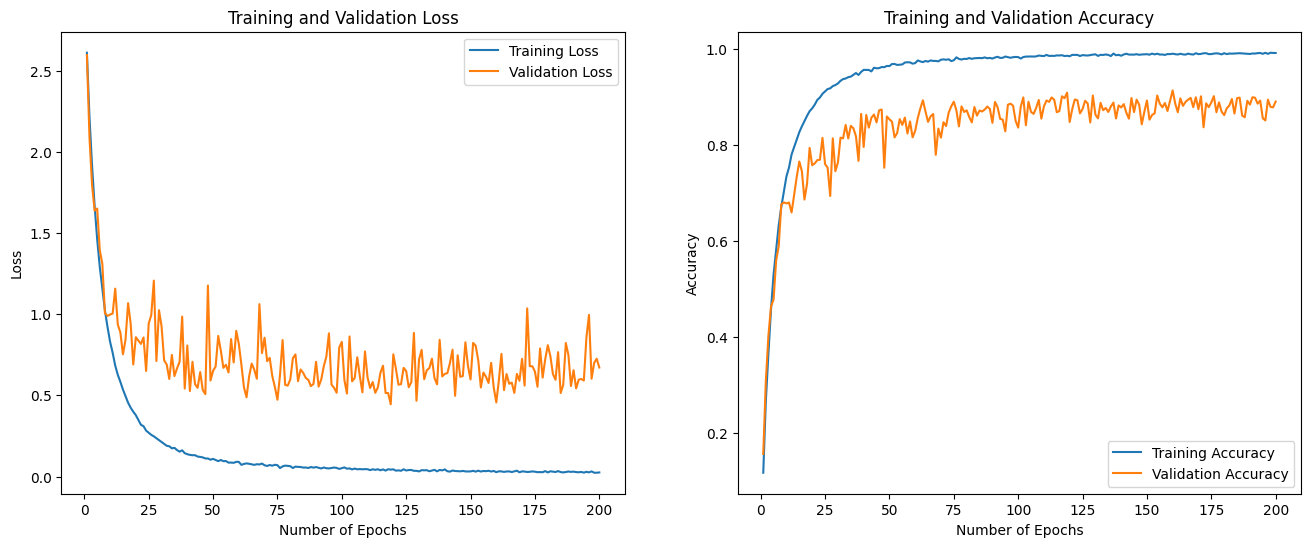

In [50]:
plot_learning_curve(Conv2D_31_aug_history.history)

**Observations**
- From the graph, the validation loss and accuracy seems to be diverging away from the training curve of the augmented data which is worse compared to the validation curve of the unaugmented data.

In [51]:
Conv2D_31_aug.evaluate(test_data_31.batch(10))

300/300 [==============================] - 2s 6ms/step - loss: 0.6455 - accuracy: 0.8927


[0.6455073356628418, 0.8926666378974915]

**Observations**
- The test accuracy shows that the accuracy was quite low, which shows that augmentation of the data does not acutally improve the 31 x 31 image.

**CNN Augmented Balance Version 2 (31 x 31)**
- Increased units of Conv2D and kernel size

In [55]:
# Try for 31 x 31 images
tf.keras.backend.clear_session()

Conv2D_31_aug_V2 = Sequential(name="Conv2D_31_Augmentation_V2",
    layers = [
        normalised_data,
        Conv2D(64, (5, 5),input_shape=(31, 31 ,1), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),

        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),

        Conv2D(256, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),

        Flatten(),
        Dropout(0.6),

        Dense(128, activation='relu'),
        Dropout(0.6),

        Dense(num_classes, activation='softmax')
    ]
)

# Compile model
opt = Adam(learning_rate=0.0001)
Conv2D_31_aug_V2.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Conv2D_31_aug_V2.build(input_shape=(None, 31, 31, 1))

Conv2D_31_aug_V2_history = Conv2D_31_aug_V2.fit(
    train_31V2.batch(10), 
    epochs=200,
    validation_data=val_data_31.batch(10)
    )

Epoch 1/200
1433/1433 [==============================] - 8s 5ms/step - loss: 2.6791 - accuracy: 0.0912 - val_loss: 2.5895 - val_accuracy: 0.1237
Epoch 2/200
1433/1433 [==============================] - 8s 5ms/step - loss: 2.4913 - accuracy: 0.1742 - val_loss: 2.3339 - val_accuracy: 0.2207
Epoch 3/200
1433/1433 [==============================] - 7s 5ms/step - loss: 2.3014 - accuracy: 0.2469 - val_loss: 2.2397 - val_accuracy: 0.2697
Epoch 4/200
1433/1433 [==============================] - 7s 5ms/step - loss: 2.1385 - accuracy: 0.3050 - val_loss: 2.2808 - val_accuracy: 0.2903
Epoch 5/200
1433/1433 [==============================] - 7s 5ms/step - loss: 2.0127 - accuracy: 0.3464 - val_loss: 1.9834 - val_accuracy: 0.3743
Epoch 6/200
1433/1433 [==============================] - 7s 5ms/step - loss: 1.9103 - accuracy: 0.3881 - val_loss: 1.8005 - val_accuracy: 0.4210
Epoch 7/200
1433/1433 [==============================] - 7s 5ms/step - loss: 1.8167 - accuracy: 0.4143 - val_loss: 1.7014 - val_ac

In [56]:
Conv2D_31_aug_V2.summary()

Model: "Conv2D_31_Augmentation_V2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalised_data (Sequential  (None, 31, 31, 1)        0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 31, 31, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 15, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                         

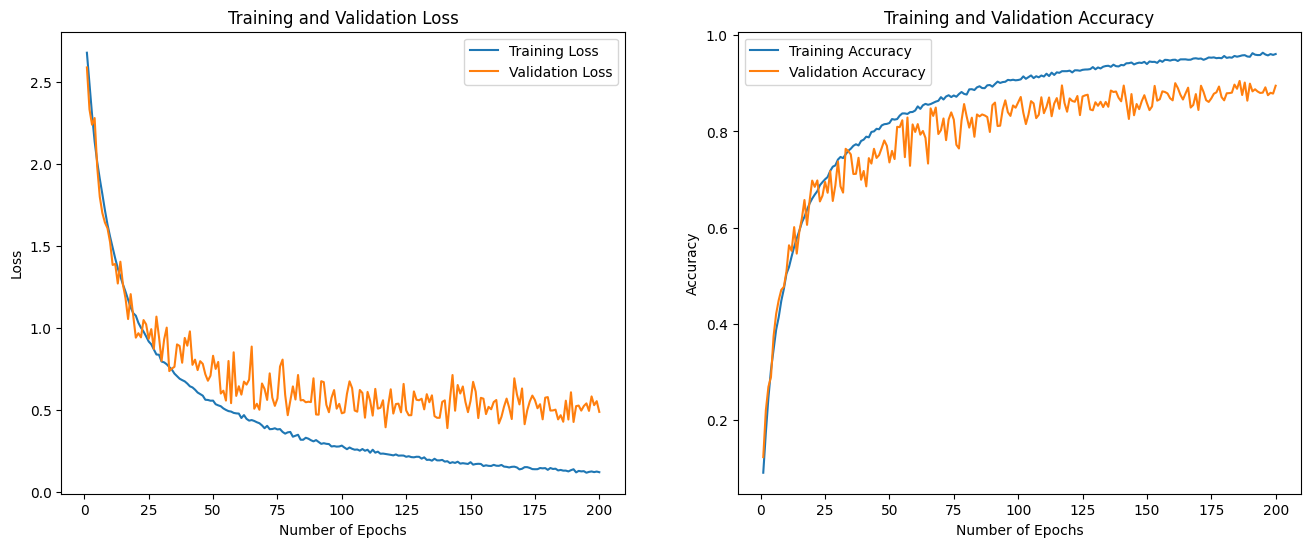

In [57]:
plot_learning_curve(Conv2D_31_aug_V2_history.history)

**Observations**
- The loss curve shows constant fluctuations in the validation loss which is generally higher than the training loss.
- The accuracy curve also shows constant fluctuations in the validation accuracy which is generally lower than the training accuracy.

In [58]:
Conv2D_31_aug_V2.evaluate(test_data_31.batch(10))

300/300 [==============================] - 1s 3ms/step - loss: 0.4920 - accuracy: 0.8943


[0.49203088879585266, 0.8943333625793457]

**Observations**
- The accuracy is slightly better than the model before but still not as good as the unaugmented one.

# 4) Model Improvement

### 128 x 128 images

#### Time-based Decay
- Used to adjust the learning rate during training by decreasing it overtime
- Starts with a relatively large learning rate and gradually reduce it as training progress.
- Beneficial for optimization and help the model to converge more efficiently
- We will make use of learning rate scheduler to make this work

$$ \text{{learning\_rate}} = \text{{learning\_rate}} \times \left(1 + \frac{k \cdot \text{{initial learning\_rate}}}{{\text{{epochs}} + 1}}\right)^{-1}
 $$

In [216]:
def time_based_decay(epoch, lr):
    initial_lr = 0.00025
    #declare number of steps
    k = 0.1
    #Avoid division error
    decay = initial_lr /(epoch+1)
    lr *= (1. / (1. + k*decay * initial_lr))
    return lr

lr_schedule = LearningRateScheduler(time_based_decay, verbose=1)

In [217]:
# Try for 128 x 128 images
tf.keras.backend.clear_session()

Conv2D_128V1_aug_lr = Sequential(name="Conv2D_128V1_Augment_LearningRate",
    layers = [
        normalised_data,
        Conv2D(64, (5, 5), activation='relu', padding='same', input_shape=(128, 128, 1), strides=(4, 4)),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu', padding='same', strides=(1, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu', padding='same', strides=(1, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(256, (3, 3), activation='relu', padding='same', strides=(1, 1)),
        MaxPooling2D((2, 2)),

        Flatten(),
        Dropout(0.5),

        Dense(1024, activation='relu'),
        Dropout(0.5),
        Dense(128, activation = 'relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ]
)

# Compile model
opt = Adam(learning_rate=0.00025)
Conv2D_128V1_aug_lr.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Conv2D_128V1_aug_lr.build(input_shape=(None, 128, 128, 1))

Conv2D_128V1_aug_lr_history = Conv2D_128V1_aug_lr.fit(
    train_128V2.batch(10), 
    epochs=100,
    validation_data=val_data_128.batch(10),
    callbacks=[lr_schedule]
    )


Epoch 1: LearningRateScheduler setting learning rate to 0.00025000001031186275.
Epoch 1/100
1433/1433 [==============================] - 9s 6ms/step - loss: 2.6363 - accuracy: 0.0958 - val_loss: 2.3595 - val_accuracy: 0.2137 - lr: 2.5000e-04

Epoch 2: LearningRateScheduler setting learning rate to 0.00025000001109311276.
Epoch 2/100
1433/1433 [==============================] - 8s 6ms/step - loss: 2.2485 - accuracy: 0.2393 - val_loss: 1.8425 - val_accuracy: 0.3780 - lr: 2.5000e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.0002500000113535295.
Epoch 3/100
1433/1433 [==============================] - 8s 6ms/step - loss: 1.8423 - accuracy: 0.3862 - val_loss: 1.3211 - val_accuracy: 0.5687 - lr: 2.5000e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.00025000001148373785.
Epoch 4/100
1433/1433 [==============================] - 8s 6ms/step - loss: 1.4413 - accuracy: 0.5315 - val_loss: 1.0554 - val_accuracy: 0.6553 - lr: 2.5000e-04

Epoch 5: LearningRateSchedul

**Observations:**
- Learning rate did not really change much but accuracy for validation is still relatively quite high, validation loss is also quite low

In [219]:
Conv2D_128V1_aug_lr.summary()

Model: "Conv2D_128V1_Augment_LearningRate"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalised_data (Sequential  (None, None, None, 1)    0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                 

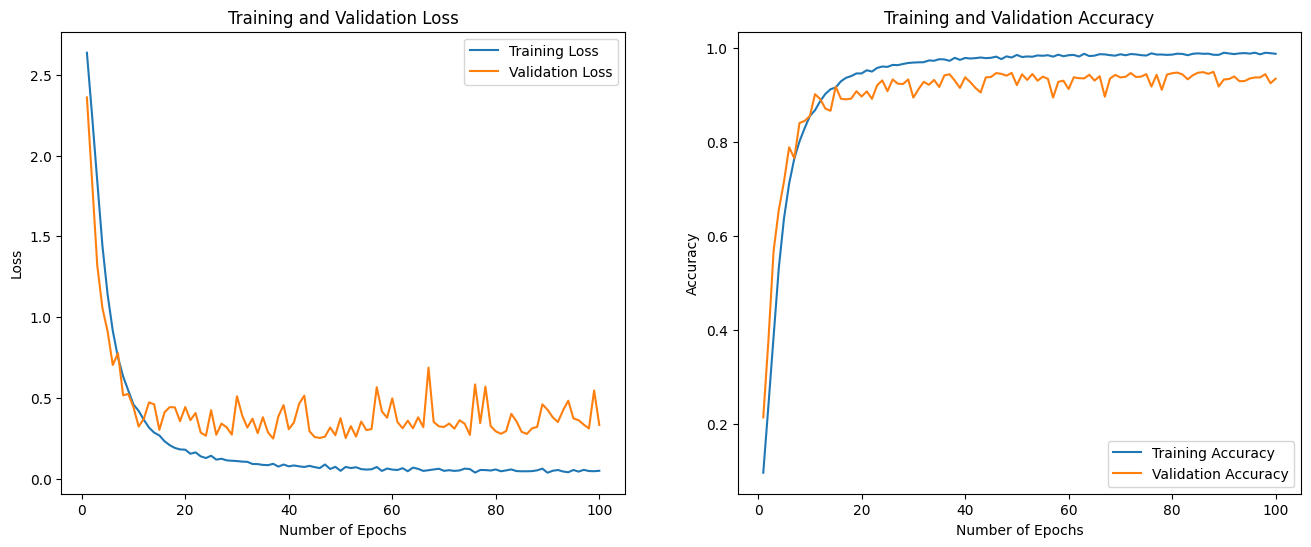

In [220]:
plot_learning_curve(Conv2D_128V1_aug_lr_history.history)

**Observations:**
- Model seems to generate quite a low validation loss and a high validation accuracy, showing that the model architecture was quite good.

In [221]:
Conv2D_128V1_aug_lr.evaluate(test_data_128.batch(10))

300/300 [==============================] - 2s 6ms/step - loss: 0.3115 - accuracy: 0.9377


[0.31153255701065063, 0.937666654586792]

**Observations:**
- Test accuracy is quite high 0.94 which means this model architecture is quite good.

### Keras Tuner
- An easy-to-use, scalable hyperparameter optimization framework that search the hyperparameter space to find the best set of hyperparameters

### Optimizers
**Adam**
- An adaptive learning rate optimization algorithm
- Maintains a moving average of both the gradients and the second moments of the gradients
- Adapts the learning rate of each parameter individually

**SGD (Stochastic Gradient Descent)**
- Basic optimization algorithm which update the model parameters based on the negative gradient of the loss function with respect to each parameter.
- Each update is based on a random subset of the training data (mini batch)
  
**RMSprop (Root Mean Square Propagation)**
- An adaptive learning rate optimization algorithm
- Address some of the limitations of basic SGD by adapting the learning rates of each parameter
- Divides the learning rate for a weight by the moving average of the magnitude of recent gradients for that weight

In [218]:
def build_128_aug_model(hp):
    model = Sequential(
        layers = [
            normalised_data,
            Conv2D(64, (5, 5), activation='relu', padding='same', input_shape=(128, 128, 1), strides=(4, 4)),
            MaxPooling2D((2, 2)),
            Conv2D(128, (3, 3), activation='relu', padding='same', strides=(1, 1)),
            MaxPooling2D((2, 2)),
            Conv2D(128, (3, 3), activation='relu', padding='same', strides=(1, 1)),
            MaxPooling2D((2, 2)),
            Conv2D(256, (3, 3), activation='relu', padding='same', strides=(1, 1)),
            MaxPooling2D((2, 2)),

            Flatten(),
            Dropout(0.5),

            Dense(1024, activation='relu'),
            Dropout(0.5),
            Dense(128, activation = 'relu'),
            Dropout(0.5),
            Dense(num_classes, activation='softmax')
        ]
    )

    optimizer_name = hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop'])

    if optimizer_name == 'adam':
        optimizer = Adam(learning_rate = 0.00025)
    elif optimizer_name == 'sgd':
        optimizer = SGD(learning_rate = 0.00025, momentum = 0.9, nesterov= True)
    elif optimizer_name == 'rmsprop':
        optimizer = RMSprop(learning_rate = 0.000025, momentum= 0.9)

    model.build(input_shape=(None, 128, 128, 1))

    # Compile model
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
    return model

In [222]:
tuner = GridSearch(build_128_aug_model, objective='val_accuracy', max_trials=3)

#search the best parameter
best_params_128 = tuner.search(
    train_128V2.batch(10),
    epochs=200,
    validation_data=val_data_128.batch(10)
    )


Trial 3 Complete [00h 30m 15s]
val_accuracy: 0.859333336353302

Best val_accuracy So Far: 0.9490000009536743
Total elapsed time: 01h 29m 32s


In [223]:
# Get the best trial
best_trial_128 = tuner.oracle.get_best_trials(num_trials=1)[0]

# Access the best parameters
best_params_128 = best_trial_128.hyperparameters.values

print(f"Best Parameters: {best_params_128}")


Best Parameters: {'optimizer': 'adam'}


**Observations**
- Keras Tuner shows that Adam Optimizer is the best optimizer

### Regularization - Reduces overfitting and improve generalisation performance of the model
- **L1 Regularization**: 
    - Penalise the absolute value of the weights. Weights may be reduced to zero which is useful when compressing the model.
$$ L1(\theta) = \lambda \sum_{i=1}^{n} |w_i| $$
- **L2 Regularization**: 
    - Known as weight decay and usually better over L1. Forces the weights to decay towards zero.
$$ L2(\theta) = \lambda \sum_{i=1}^{n} w_i^2 $$
- **Dropout**
    - Have been using this form of regularisation so far.
    - At every iteration, it randomly selects some nodes and removes them along with all of their incoming and outgoing connections as shown below.
- I have also increased the learning rate so that the model will learn and converge faster

In [249]:
# Try for 128 x 128 images
tf.keras.backend.clear_session()

Conv2D_128_improved_aug = Sequential(name="Conv2D_128_Final_Augmentation",
    layers = [
        normalised_data,
        Conv2D(64, (5, 5), activation='relu', padding='same', input_shape=(128, 128, 1), strides=(4, 4)),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu', padding='same', strides=(1, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu', padding='same', strides=(1, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(256, (3, 3), activation='relu', padding='same', strides=(1, 1)),
        MaxPooling2D((2, 2)),

        Flatten(),
        Dropout(0.5),

        Dense(1024, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.5),
        Dense(128, activation = 'relu', kernel_regularizer=l2(0.001)),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ]
)

# Compile model
opt = Adam(learning_rate=0.0001)
Conv2D_128_improved_aug.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Conv2D_128_improved_aug.build(input_shape=(None, 128, 128, 1))

Conv2D_128_improved_aug_history = Conv2D_128_improved_aug.fit(
    train_128V2.batch(10), 
    epochs=200,
    validation_data=val_data_128.batch(10)
    )

Epoch 1/200
1433/1433 [==============================] - 9s 6ms/step - loss: 3.2968 - accuracy: 0.0768 - val_loss: 2.8500 - val_accuracy: 0.1233
Epoch 2/200
1433/1433 [==============================] - 8s 6ms/step - loss: 2.6585 - accuracy: 0.1735 - val_loss: 2.2171 - val_accuracy: 0.3210
Epoch 3/200
1433/1433 [==============================] - 9s 6ms/step - loss: 2.2384 - accuracy: 0.3116 - val_loss: 1.9537 - val_accuracy: 0.4183
Epoch 4/200
1433/1433 [==============================] - 9s 6ms/step - loss: 1.9870 - accuracy: 0.3967 - val_loss: 1.7491 - val_accuracy: 0.4733
Epoch 5/200
1433/1433 [==============================] - 8s 6ms/step - loss: 1.7500 - accuracy: 0.4751 - val_loss: 1.4121 - val_accuracy: 0.5770
Epoch 6/200
1433/1433 [==============================] - 9s 6ms/step - loss: 1.5765 - accuracy: 0.5381 - val_loss: 1.4009 - val_accuracy: 0.5837
Epoch 7/200
1433/1433 [==============================] - 8s 6ms/step - loss: 1.4392 - accuracy: 0.5861 - val_loss: 1.1800 - val_ac

In [250]:
Conv2D_128_improved_aug.summary()

Model: "Conv2D_128_Final_Augmentation"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalised_data (Sequential  (None, None, None, 1)    0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                     

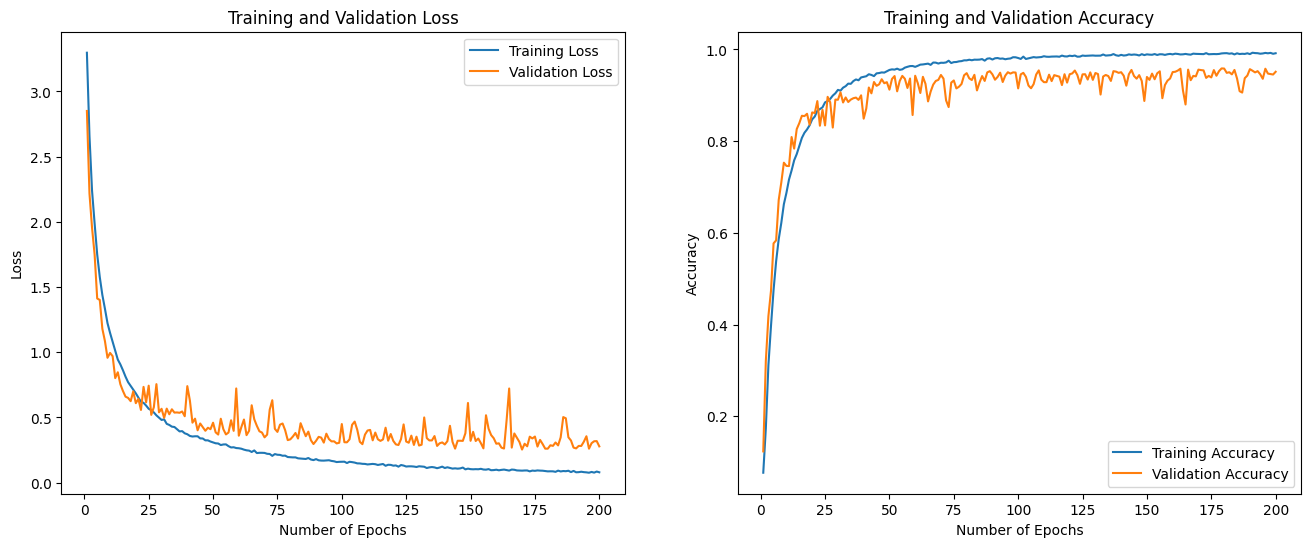

In [251]:
plot_learning_curve(Conv2D_128_improved_aug_history.history)

**Observations**
- Validation accuracy and loss curve are converging towards the training curve, which shows the decrease in learning rate and regularisation do indeed improve the accuracy.

In [252]:
Conv2D_128_improved_aug.evaluate(test_data_128.batch(10))

300/300 [==============================] - 2s 7ms/step - loss: 0.2710 - accuracy: 0.9493


[0.2709842622280121, 0.9493333101272583]

**Observations**
- Testing accuracy is quite high for this curve, accuracy of 90% is achieved.

### 31 x 31 images

#### Time-based Decay

In [224]:
# Try for 31 x 31 images
tf.keras.backend.clear_session()

Conv2D_31_lr = Sequential(name="Conv2D_31V1",
    layers = [
        normalised_data,
        Conv2D(32, (3, 3),input_shape=(31, 31 ,1), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),

        Flatten(),
        Dropout(0.5),

        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(256, activation='relu'),
        Dropout(0.5),

        Dense(num_classes, activation='softmax')
    ]
)

# Compile model
opt = Adam(learning_rate=0.00025)
Conv2D_31_lr.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Conv2D_31_lr.build(input_shape=(None, 31, 31, 1))

Conv2D_31_lr_history = Conv2D_31_lr.fit(
    train_data_31.batch(10), 
    epochs=200,
    validation_data=val_data_31.batch(10),
    callbacks=[lr_schedule]
    )


Epoch 1: LearningRateScheduler setting learning rate to 0.00025000001031186275.
Epoch 1/200
903/903 [==============================] - 8s 8ms/step - loss: 2.5878 - accuracy: 0.1120 - val_loss: 2.4884 - val_accuracy: 0.1540 - lr: 2.5000e-04

Epoch 2: LearningRateScheduler setting learning rate to 0.00025000001109311276.
Epoch 2/200
903/903 [==============================] - 7s 8ms/step - loss: 2.2192 - accuracy: 0.2559 - val_loss: 2.0248 - val_accuracy: 0.3647 - lr: 2.5000e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.0002500000113535295.
Epoch 3/200
903/903 [==============================] - 7s 8ms/step - loss: 1.8557 - accuracy: 0.4021 - val_loss: 1.5971 - val_accuracy: 0.4763 - lr: 2.5000e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.00025000001148373785.
Epoch 4/200
903/903 [==============================] - 7s 8ms/step - loss: 1.5413 - accuracy: 0.5010 - val_loss: 1.3127 - val_accuracy: 0.5763 - lr: 2.5000e-04

Epoch 5: LearningRateScheduler setti

**Observations**
- Learning rate once again did not change much but the validation accuracy still managed to improve all the way to 94%.

In [225]:
Conv2D_31_lr.summary()

Model: "Conv2D_31V1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalised_data (Sequential  (None, None, None, 1)    0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 31, 31, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 15, 15, 128)       

In [226]:
plot_learning_curve(Conv2D_31_lr_history.history)

**Observations**
- Validation loss and accuracy are quite close to the training loss and accuracy, achieving close to 0.9+ accuracy, loss is also kept as low as 0.5+

In [227]:
Conv2D_31_lr.evaluate(test_data_31.batch(10))

300/300 [==============================] - 2s 5ms/step - loss: 0.2863 - accuracy: 0.9433


[0.28634753823280334, 0.9433333277702332]

**Observations**
- Might have to decrease the steps for the learning rate to have a more drastic change
- Test accuracy is still 90+ which shows how accurate this model is.

### Regularization - Reduces overfitting and improve generalisation performance of the model

In [237]:
## Using L2 Regularization for 31 x 31 images
tf.keras.backend.clear_session()

Conv2D_31_L2 = Sequential(name="Conv2D_31_L2",
    layers = [
        normalised_data,
        Conv2D(32, (3, 3),input_shape=(31, 31 ,1), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),

        Flatten(),
        Dropout(0.5),

        Dense(512, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.5),
        Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.5),
        Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.5),

        Dense(num_classes, activation='softmax')
    ]
)

# Compile model
opt = Adam(learning_rate=0.0001)
Conv2D_31_L2.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Conv2D_31_L2.build(input_shape=(None, 31, 31, 1))

Conv2D_31_L2_history = Conv2D_31_L2.fit(
    train_data_31.batch(10), 
    epochs=200,
    validation_data=val_data_31.batch(10)
    )

Epoch 1/200
903/903 [==============================] - 8s 8ms/step - loss: 7.3834 - accuracy: 0.0912 - val_loss: 4.1177 - val_accuracy: 0.0667
Epoch 2/200
903/903 [==============================] - 8s 8ms/step - loss: 3.3857 - accuracy: 0.1459 - val_loss: 3.0769 - val_accuracy: 0.1787
Epoch 3/200
903/903 [==============================] - 8s 8ms/step - loss: 2.8199 - accuracy: 0.2111 - val_loss: 2.6438 - val_accuracy: 0.3187
Epoch 4/200
903/903 [==============================] - 8s 8ms/step - loss: 2.4926 - accuracy: 0.3188 - val_loss: 2.3643 - val_accuracy: 0.3783
Epoch 5/200
903/903 [==============================] - 8s 8ms/step - loss: 2.2984 - accuracy: 0.3816 - val_loss: 2.1836 - val_accuracy: 0.4220
Epoch 6/200
903/903 [==============================] - 8s 8ms/step - loss: 2.1713 - accuracy: 0.4251 - val_loss: 2.0838 - val_accuracy: 0.4353
Epoch 7/200
903/903 [==============================] - 8s 8ms/step - loss: 2.0778 - accuracy: 0.4520 - val_loss: 1.9781 - val_accuracy: 0.4763

In [238]:
plot_learning_curve(Conv2D_31_L2_history.history)

**Observations**
- The curves show how accurate the training and validation accuracy is after including L2, the losses experienced are also quite similar.

In [239]:
Conv2D_31_L2.evaluate(test_data_31.batch(10))

300/300 [==============================] - 2s 5ms/step - loss: 0.7772 - accuracy: 0.9347


[0.7772353291511536, 0.9346666932106018]

**Observations**
- Accuracy definitely improved after regularizing.

**CNN Augmented Balance Regularisation Version 1**
- I will attempt to improve the accuracy of the model to 93% through regularising

In [75]:
# Try for 31 x 31 images
tf.keras.backend.clear_session()

Conv2D_31_aug_l2 = Sequential(name="Conv2D_31_Augmentation_L2_Regularization",
    layers = [
        normalised_data,
        Conv2D(64, (5, 5),input_shape=(31, 31 ,1), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),

        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),

        Conv2D(256, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),

        Flatten(),
        Dropout(0.5),

        Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.5),
        BatchNormalization(),

        Dense(num_classes, activation='softmax')
    ]
)

# Compile model
opt = Adam(learning_rate=0.0001)
Conv2D_31_aug_l2.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Conv2D_31_aug_l2.build(input_shape=(None, 31, 31, 1))

Conv2D_31_aug_l2_history = Conv2D_31_aug_l2.fit(
    train_31V2.batch(32), 
    epochs=200,
    validation_data=val_data_31.batch(32)
    )

Epoch 1/200
1433/1433 [==============================] - 6s 4ms/step - loss: 4.8458 - accuracy: 0.1430 - val_loss: 3.6078 - val_accuracy: 0.2090
Epoch 2/200
1433/1433 [==============================] - 6s 4ms/step - loss: 2.9239 - accuracy: 0.3238 - val_loss: 2.4861 - val_accuracy: 0.3667
Epoch 3/200
1433/1433 [==============================] - 6s 4ms/step - loss: 2.1846 - accuracy: 0.4416 - val_loss: 2.1041 - val_accuracy: 0.4450
Epoch 4/200
1433/1433 [==============================] - 6s 4ms/step - loss: 1.8330 - accuracy: 0.5298 - val_loss: 1.8714 - val_accuracy: 0.4960
Epoch 5/200
1433/1433 [==============================] - 6s 4ms/step - loss: 1.5933 - accuracy: 0.5932 - val_loss: 1.6311 - val_accuracy: 0.5703
Epoch 6/200
1433/1433 [==============================] - 6s 4ms/step - loss: 1.4237 - accuracy: 0.6401 - val_loss: 1.4915 - val_accuracy: 0.6070
Epoch 7/200
1433/1433 [==============================] - 6s 4ms/step - loss: 1.2976 - accuracy: 0.6856 - val_loss: 1.4689 - val_ac

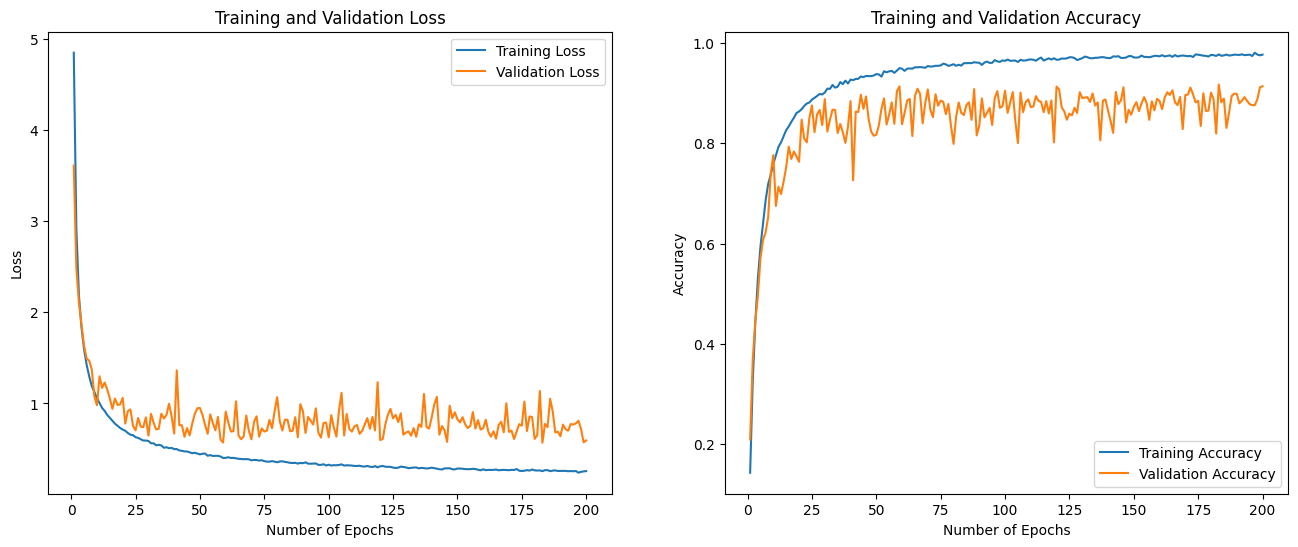

In [76]:
plot_learning_curve(Conv2D_31_aug_l2_history.history)

**Observations**
- From what I can see, the validation loss is still higher than the training loss, unable to converge as well as the unaugmented data.
- For accuracy, the validation accuracy is still lower than the training accuracy.

In [77]:
Conv2D_31_aug_l2.evaluate(test_data_31.batch(10))

300/300 [==============================] - 1s 3ms/step - loss: 0.6360 - accuracy: 0.9050


[0.6360276341438293, 0.9049999713897705]

**Observations**
- The test accuracy may be quite high, reaching 90% accuracy but it was deemed lucky as the learning curve has shown.

**CNN Augmented Balance Regularisation Version 2**
- Since batch normalisation is used, I will attempt to increase the batch size as batch normalisation tends to work better for data with bigger batch size.

In [81]:
# Try for 31 x 31 images
tf.keras.backend.clear_session()

Conv2D_31_aug_l2_V2 = Sequential(name="Conv2D_31_Augmentation_L2_Regularization_Version2",
    layers = [
        normalised_data,
        Conv2D(64, (5, 5),input_shape=(31, 31 ,1), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),

        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),

        Conv2D(256, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),

        Flatten(),
        Dropout(0.6),

        Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.6),
        BatchNormalization(),

        Dense(num_classes, activation='softmax')
    ]
)

# Compile model
opt = Adam(learning_rate=0.0001)
Conv2D_31_aug_l2_V2.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Conv2D_31_aug_l2_V2.build(input_shape=(None, 31, 31, 1))

Conv2D_31_aug_l2_V2_history = Conv2D_31_aug_l2_V2.fit(
    train_31V2.batch(32), 
    epochs=200,
    validation_data=val_data_31.batch(32)
    )

Epoch 1/200
448/448 [==============================] - 3s 5ms/step - loss: 5.8983 - accuracy: 0.1011 - val_loss: 4.8795 - val_accuracy: 0.2317
Epoch 2/200
448/448 [==============================] - 2s 4ms/step - loss: 4.1911 - accuracy: 0.2115 - val_loss: 3.6575 - val_accuracy: 0.2633
Epoch 3/200
448/448 [==============================] - 2s 4ms/step - loss: 3.2832 - accuracy: 0.3083 - val_loss: 3.0719 - val_accuracy: 0.3100
Epoch 4/200
448/448 [==============================] - 2s 4ms/step - loss: 2.7060 - accuracy: 0.3895 - val_loss: 2.3375 - val_accuracy: 0.4817
Epoch 5/200
448/448 [==============================] - 2s 4ms/step - loss: 2.3172 - accuracy: 0.4508 - val_loss: 2.3120 - val_accuracy: 0.4207
Epoch 6/200
448/448 [==============================] - 2s 4ms/step - loss: 2.0300 - accuracy: 0.5076 - val_loss: 1.9782 - val_accuracy: 0.5087
Epoch 7/200
448/448 [==============================] - 2s 4ms/step - loss: 1.8234 - accuracy: 0.5559 - val_loss: 1.6882 - val_accuracy: 0.5853

In [82]:
plot_learning_curve(Conv2D_31_aug_l2_V2_history.history)

**Observations**
- The learning curves look better than the previous model but it is still unable to converge as well as the unaugmented data, hence I will use the unaugmented data as the final model.

In [83]:
Conv2D_31_aug_l2_V2.evaluate(test_data_31.batch(32))

94/94 [==============================] - 1s 4ms/step - loss: 0.6151 - accuracy: 0.8893


[0.6150560975074768, 0.8893333077430725]

**Observations**
- Accuracy of 88% is quite high but still not as high as the unaugmented data.

### Final Models
- Based on observations of the learning curve, I have picked my two final models to classify 31 x 31 images and 128 x 128 images.
  - **31 x 31 image**: L2 Regularizer Conv2D
  - **128 x 128 image**: L2 Regularizer Conv2D with Augmentation

In [248]:
# Save the weights for 31 x 31
Conv2D_31_L2.save_weights("./CNN_FinalModels/Final_31x31.h5")

In [253]:
# Save the weights for 128 x 128
Conv2D_128_improved_aug.save_weights("./CNN_FinalModels/Final_128x128.h5")

### Model Evaluation

**31 x 31 images**

In [240]:
# Create a list of images and labels
data_split = [(img.numpy(), classes[labels]) for img, labels in test_data_31]

# Convert the list to numpy arrays
X_test_31 = np.array([img for img, label in data_split])
y_test_31 = np.array([label for img, label in data_split])

y_test_int_31 = np.array([class_to_index[label] for label in y_test_31])
print(X_test_31.shape)
print(y_test_int_31.shape)

(3000, 31, 31, 1)
(3000,)


In [241]:
y_pred_31 = Conv2D_31_L2.predict(X_test_31)

94/94 [==============================] - 0s 5ms/step


In [246]:
report_31 = classification_report(
    y_test_int_31, 
    np.argmax(y_pred_31, axis=1), 
    target_names=classes)
print(report_31)

              precision    recall  f1-score   support

        Bean       0.95      0.94      0.94       200
Bitter_Gourd       0.95      0.94      0.94       200
Bottle_Gourd       0.97      0.99      0.98       200
     Brinjal       0.92      0.94      0.93       200
    Broccoli       0.94      0.95      0.95       200
     Cabbage       0.93      0.92      0.92       200
    Capsicum       0.95      0.95      0.95       200
      Carrot       0.98      0.89      0.93       200
 Cauliflower       0.90      0.94      0.92       200
    Cucumber       0.92      0.98      0.95       200
      Papaya       0.94      0.94      0.94       200
      Potato       0.90      0.90      0.90       200
     Pumpkin       0.91      0.95      0.93       200
      Radish       0.97      0.92      0.94       200
      Tomato       0.89      0.88      0.88       200

    accuracy                           0.93      3000
   macro avg       0.94      0.93      0.93      3000
weighted avg       0.94   

**Observations**
- Based on the other score metrics like precision, recall and f1, the scores seem to show that the vegetables are being identified quite well.

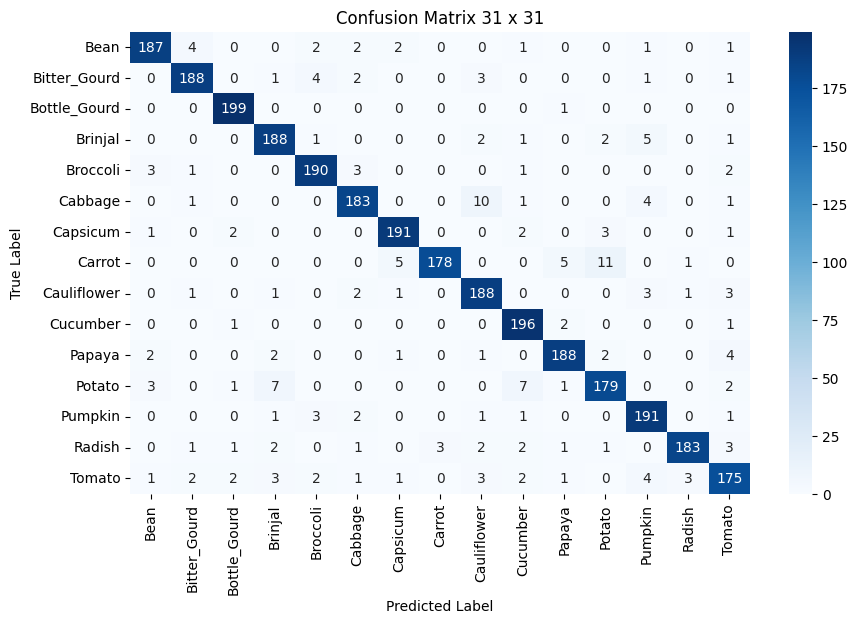

In [258]:
# Display the confusion matrix
cm_31 = confusion_matrix(y_test_int_31, np.argmax(y_pred_31, axis=1))

cm_df = pd.DataFrame(cm_31, index=classes, columns=classes)
plt.figure(figsize=(10, 6))
sns.heatmap(cm_df, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix 31 x 31")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

**Observations**:
- Based on observations, it seems that cabbage and cauliflower are getting mixed up, as well as carrot and potato. Most likely the lower pixels caused some details to be lost.
- Cabbage and cauliflower have similar sizes and the lower pixels caused details like shapes and textures to be lost.

In [244]:
def PrintSampleImages(model, test_data, num_samples=5):
    # Get predictions for a batch of test images
    img, label = iter(test_data).next()
    predictions = model.predict(img)

    # Plot the sample images along with their predictions
    plt.figure(figsize=(15, 3))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img[i], cmap='gray')
        plt.title(f"Predicted: {classes[np.argmax(predictions[i])]}")
        plt.axis("off")
    plt.show()

sample_images = PrintSampleImages(model=Conv2D_31_L2, test_data=test_data_31.batch(10))

1/1 [==============================] - 0s 15ms/step


In [264]:
incorrect_indices_31 = np.where(np.argmax(y_pred_31, axis=1) != y_test_int_31)[0]

# Randomly select a few incorrect predictions for visualisation
num_samples = min(5, len(incorrect_indices_31))
selected_indices_31 = np.random.choice(incorrect_indices_31, size=num_samples, replace=False)

#Visualise the images
plt.figure(figsize=(15, 5))

for i, index in enumerate(selected_indices_31):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(X_test_31[index], cmap='gray')
    plt.title(f"True: {classes[y_test_int_31[index]]}\nPredicted: {classes[np.argmax(y_pred_31, axis=1)[index]]}")
    plt.axis("off")

**Observations**
- As such, the lower pixels caused the textures to be lost, causing images like radish and cucumber to be mixed up.

**128 x 128 images**

In [245]:
# Create a list of images and labels
data_split = [(img.numpy(), classes[labels]) for img, labels in test_data_128]

# Convert the list to numpy arrays
X_test_128 = np.array([img for img, label in data_split])
y_test_128 = np.array([label for img, label in data_split])

y_test_int_128 = np.array([class_to_index[label] for label in y_test_128])
print(X_test_128.shape)
print(y_test_128.shape)

(3000, 128, 128, 1)
(3000,)


In [254]:
y_pred_128 = Conv2D_128_improved_aug.predict(X_test_128)

94/94 [==============================] - 1s 3ms/step


In [255]:
report_128 = classification_report(
    y_test_int_128, 
    np.argmax(y_pred_128, axis=1), 
    target_names=classes)
print(report_128)

              precision    recall  f1-score   support

        Bean       0.97      0.97      0.97       200
Bitter_Gourd       1.00      0.92      0.96       200
Bottle_Gourd       0.93      0.98      0.96       200
     Brinjal       0.86      0.94      0.90       200
    Broccoli       0.93      0.97      0.95       200
     Cabbage       0.91      0.94      0.93       200
    Capsicum       0.99      0.96      0.98       200
      Carrot       0.98      0.94      0.96       200
 Cauliflower       0.94      0.94      0.94       200
    Cucumber       0.99      0.95      0.97       200
      Papaya       0.95      0.95      0.95       200
      Potato       0.97      0.94      0.96       200
     Pumpkin       0.94      0.93      0.93       200
      Radish       0.99      0.94      0.96       200
      Tomato       0.90      0.94      0.92       200

    accuracy                           0.95      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.95   

**Observations**
- Based on the other score metrics like precision, recall and f1, the scores seem to show that the vegetables are being identified quite well.

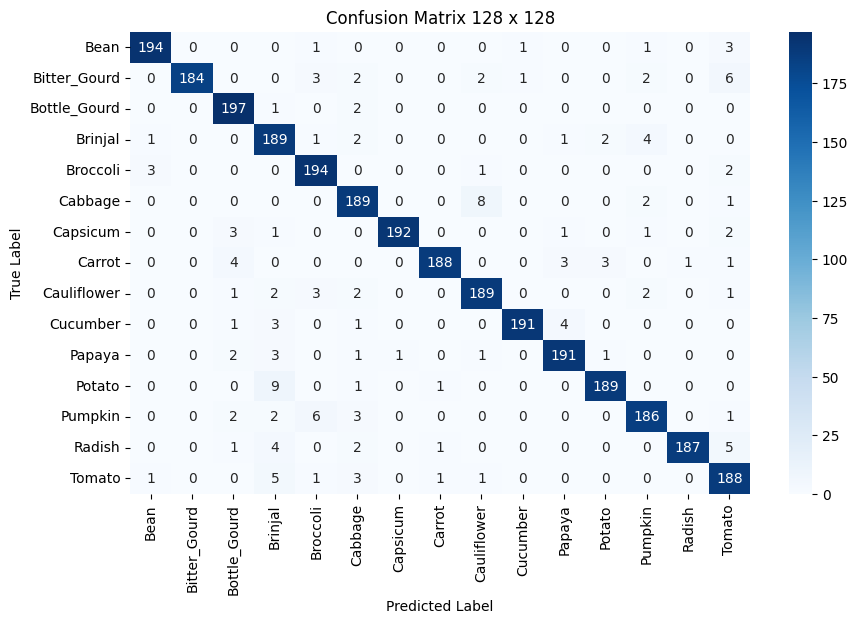

In [259]:
# Display the confusion matrix
cm_128 = confusion_matrix(y_test_int_128, np.argmax(y_pred_128, axis=1))

cm_df = pd.DataFrame(cm_128, index=classes, columns=classes)
plt.figure(figsize=(10, 6))
sns.heatmap(cm_df, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix 128 x 128")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

**Observations**:
- Vegetables like Brinjal and Potato are easy for the CNN to mix up as they are shaped quite similarly, hence it has the most labels getting mixed up.
- Otherwise, the model is able to predict most labels accurately.

In [257]:
sample_images = PrintSampleImages(model=Conv2D_128_improved_aug, test_data=test_data_128.batch(10))

1/1 [==============================] - 0s 16ms/step


**Error Analysis**
- We will only inspect the 128 x 128 images as it is clearer for us to visualise what went wrong.

In [261]:
incorrect_indices_128 = np.where(np.argmax(y_pred_128, axis=1) != y_test_int_128)[0]

# Randomly select a few incorrect predictions for visualisation
num_samples = min(5, len(incorrect_indices_128))
selected_indices_128 = np.random.choice(incorrect_indices_128, size=num_samples, replace=False)

#Visualise the images
plt.figure(figsize=(15, 5))

for i, index in enumerate(selected_indices_128):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(X_test_128[index], cmap='gray')
    plt.title(f"True: {classes[y_test_int_128[index]]}\nPredicted: {classes[np.argmax(y_pred_128, axis=1)[index]]}")
    plt.axis("off")

**Observations**
- Based on the images, we can see that vegetables like radish is very hard to predict correctly without the use of colors, same goes with the others.
- Shapes of the other vegetables like papaya and potato are also quite similar hence the CNN model will also think the same way.
- I am not sure why papaya is even considered a vegetable in the dataset but it is.

# 5) Summary
In summary, when training CNN models, regularization techniques like L2 and Dropout are very efficient when dealing with images of smaller batch sizes. Data augmentation does help the model's accuracy to a certain extent but it depends on case-to-case scenarios. Room for improvement can be made to the images like trying image segmentation or even trying out other models like VGG to classify the vegetables.